# Data Preperation and Analysis

In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
from dateutil.relativedelta import relativedelta
plt.style.use('fivethirtyeight')
from pylab import rcParams
rcParams['figure.figsize'] = 10,7
import matplotlib.dates as mdates
import time
import seaborn as sns
# Use seaborn style defaults and set the default figure size
sns.set(rc={'figure.figsize':(15, 6)})
import statsmodels.api as sm
import numpy as np

In [2]:
df = pd.read_csv('Data/train.csv')
print(df.shape)

df['Date'] = pd.to_datetime(df['Index'], format='%d/%m/%Y %H:%M')

df = df[['Date','Load']]
df = df.set_index('Date')
df.head(3)

(8064, 2)


Load
Date                      
2013-01-01 00:00:00  714.6
2013-01-01 00:15:00  784.7
2013-01-01 00:30:00  644.0

In [3]:
df.index

DatetimeIndex(['2013-01-01 00:00:00', '2013-01-01 00:15:00',
               '2013-01-01 00:30:00', '2013-01-01 00:45:00',
               '2013-01-01 01:00:00', '2013-01-01 01:15:00',
               '2013-01-01 01:30:00', '2013-01-01 01:45:00',
               '2013-01-01 02:00:00', '2013-01-01 02:15:00',
               ...
               '2013-03-25 21:30:00', '2013-03-25 21:45:00',
               '2013-03-25 22:00:00', '2013-03-25 22:15:00',
               '2013-03-25 22:30:00', '2013-03-25 22:45:00',
               '2013-03-25 23:00:00', '2013-03-25 23:15:00',
               '2013-03-25 23:30:00', '2013-03-25 23:45:00'],
              dtype='datetime64[ns]', name='Date', length=8064, freq=None)

In [4]:
df['Year'] = df.index.year
df['Month'] = df.index.month
df['Weekday Name'] = df.index.day_name()

In [5]:
df.sample(5, random_state=0)

Load  Year  Month Weekday Name
Date                                                 
2013-02-17 15:30:00   600.8  2013      2       Sunday
2013-03-16 02:00:00   616.9  2013      3     Saturday
2013-01-03 21:00:00  1247.1  2013      1     Thursday
2013-02-26 10:00:00   878.6  2013      2      Tuesday
2013-03-16 13:15:00   823.3  2013      3     Saturday

## Complete Time Series Plot

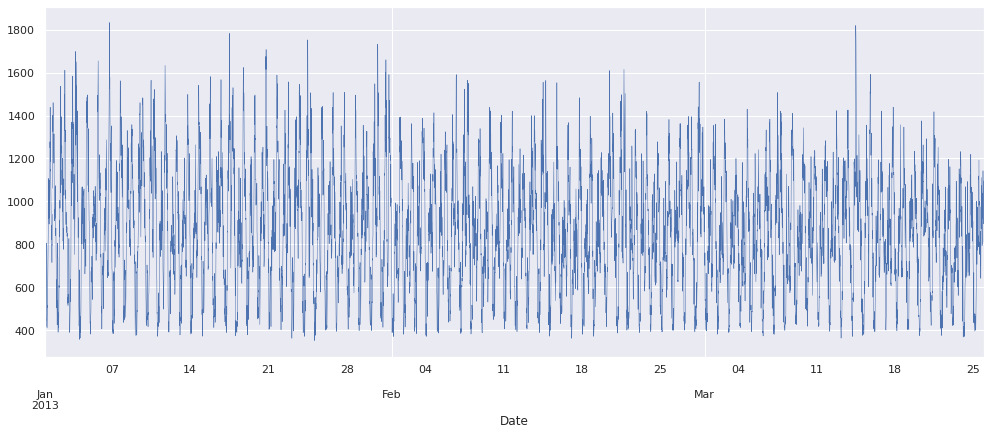

In [6]:
df['Load'].plot(linewidth=0.5);

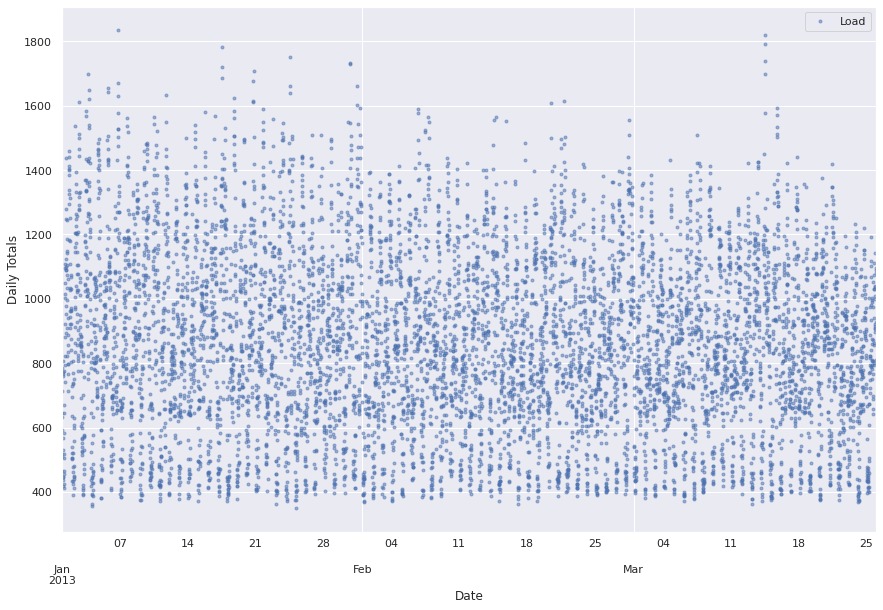

In [7]:
cols_plot = ['Load']
axes = df[cols_plot].plot(marker='.', alpha=0.5, linestyle='None', figsize=(13, 9), subplots=True)
for ax in axes:
    ax.set_ylabel('Daily Totals')

## Monthly Plots
Mpnthly plot shows that this time-series is Stationary

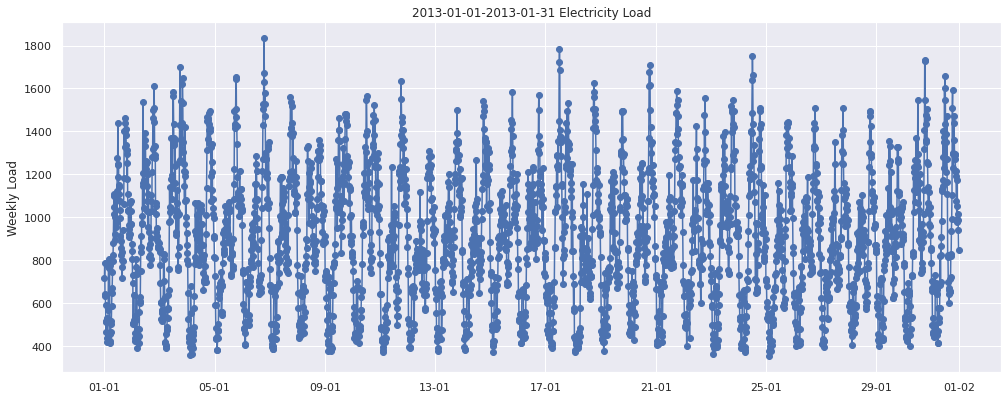

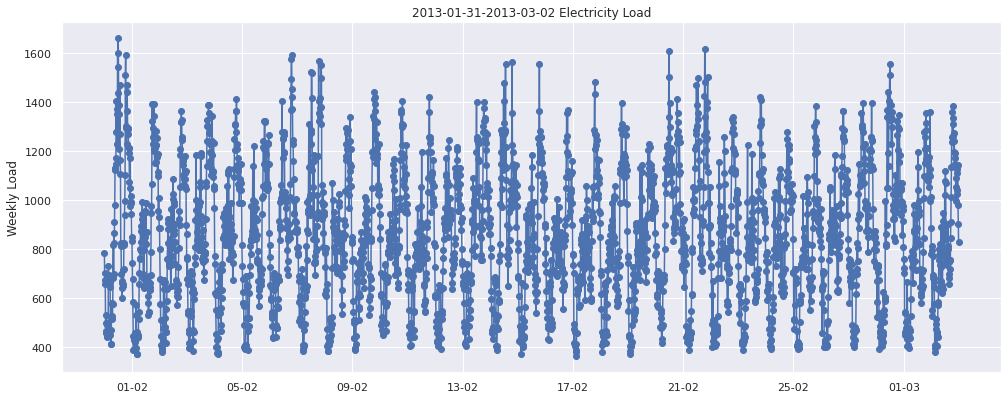

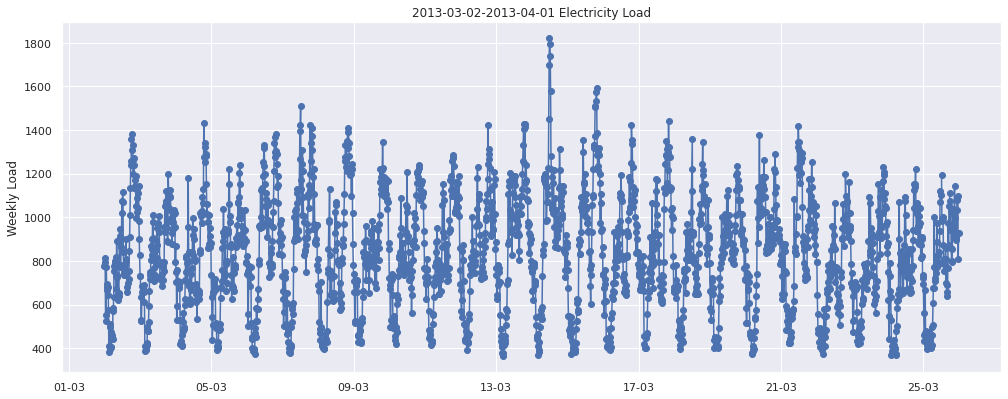

In [8]:
# Monthly Plot
start_date = df.index.min().date()
dt = datetime(year=start_date.year, month=start_date.month, day=start_date.day, hour=0, minute=0, second=0)
for index in range(0, 3):
    if index==0:
        dt = datetime(year=start_date.year, month=start_date.month, day=start_date.day, hour=0, minute=0, second=0)
    else:
        dt = dt+ timedelta(days=30)
    dt2 = dt + timedelta(days=30)+timedelta(hours=23, minutes=45, seconds=0)
    start = f'{dt:%Y-%m-%d}'
    end = f'{dt2:%Y-%m-%d}'
    #print(start, end)
    fig, ax = plt.subplots()
    ax.plot(df.loc[start:end, 'Load'], marker='o', linestyle='-')
    ax.set_ylabel('Weekly Load')
    ax.set_title(f'{start}-{end} Electricity Load')
    # Set x-axis major ticks to weekly interval, on Mondays
    #ax.xaxis.set_major_locator(mdates.WeekdayLocator(byweekday=mdates.MONDAY))
    # Format x-tick labels as 3-letter month name and day number
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m'));

## Weekly Plots

2013-01-01 2013-01-08
2013-01-08 2013-01-15
2013-01-15 2013-01-22
2013-01-22 2013-01-29
2013-01-29 2013-02-05
2013-02-05 2013-02-12
2013-02-12 2013-02-19
2013-02-19 2013-02-26
2013-02-26 2013-03-05
2013-03-05 2013-03-12
2013-03-12 2013-03-19
2013-03-19 2013-03-26


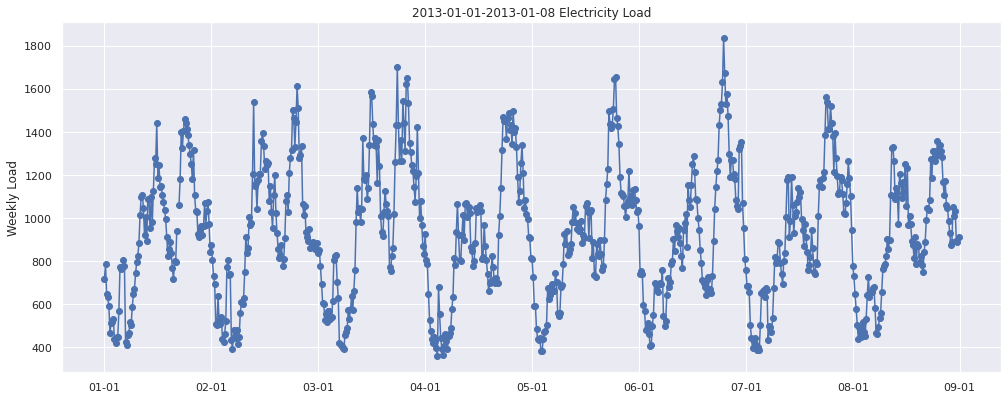

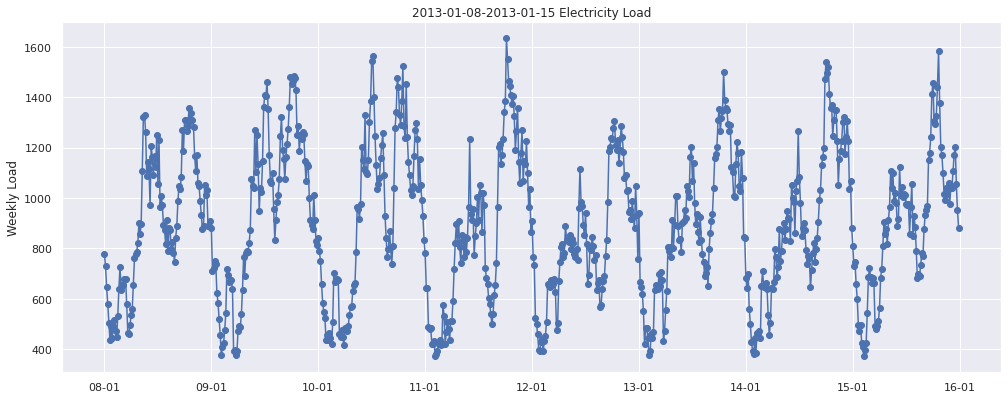

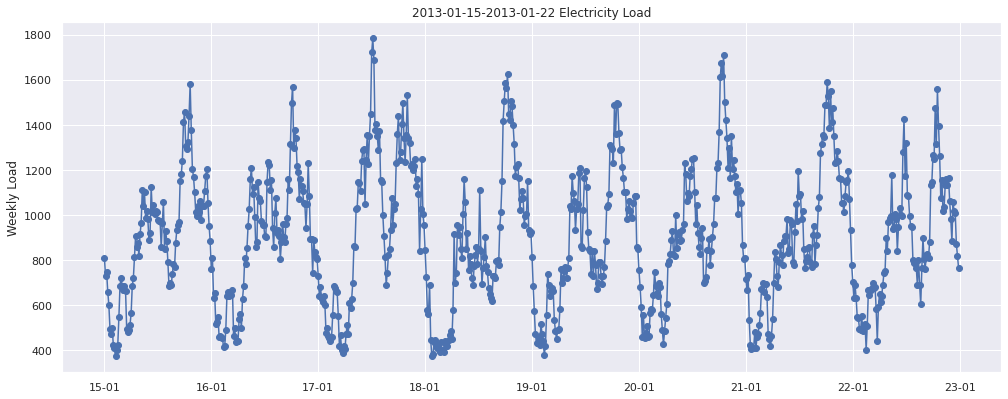

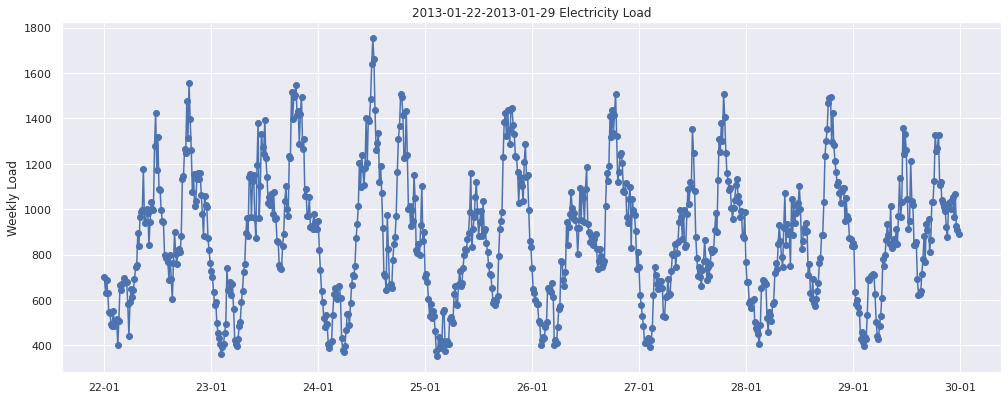

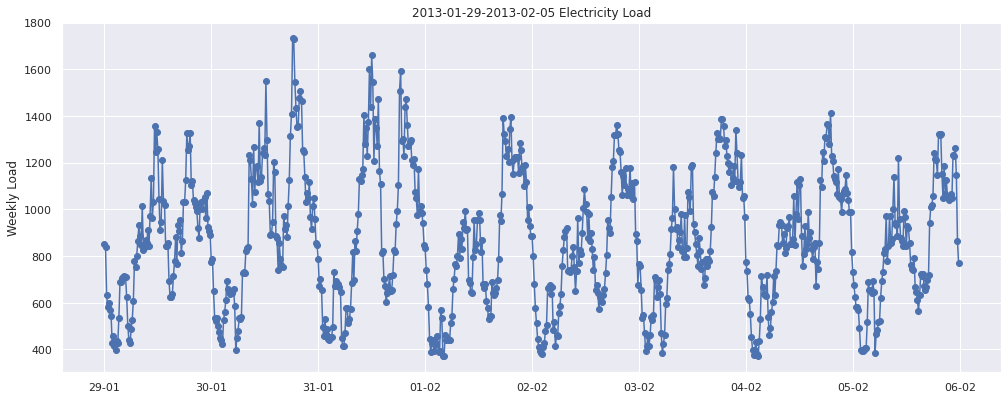

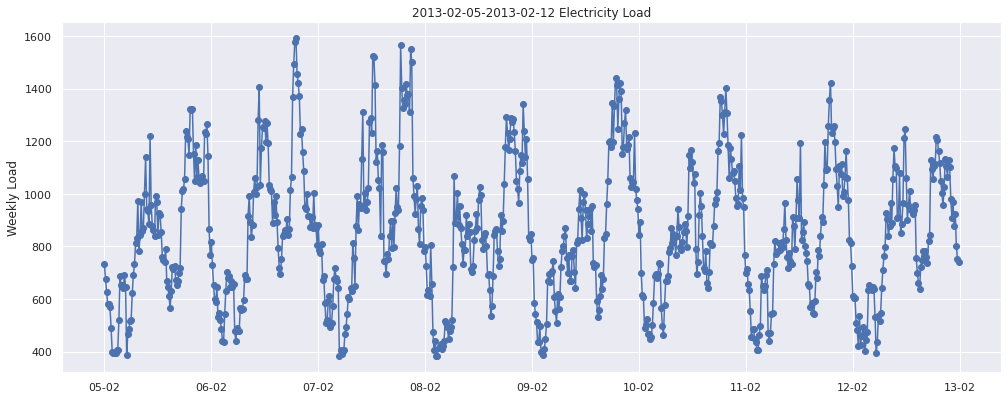

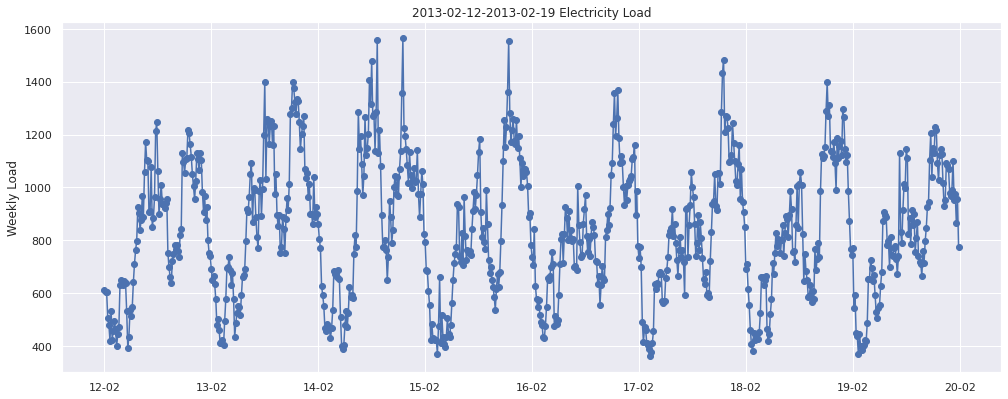

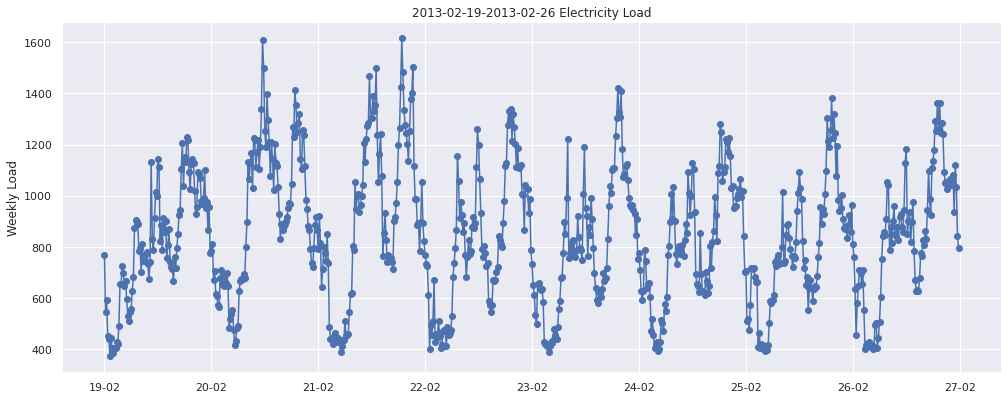

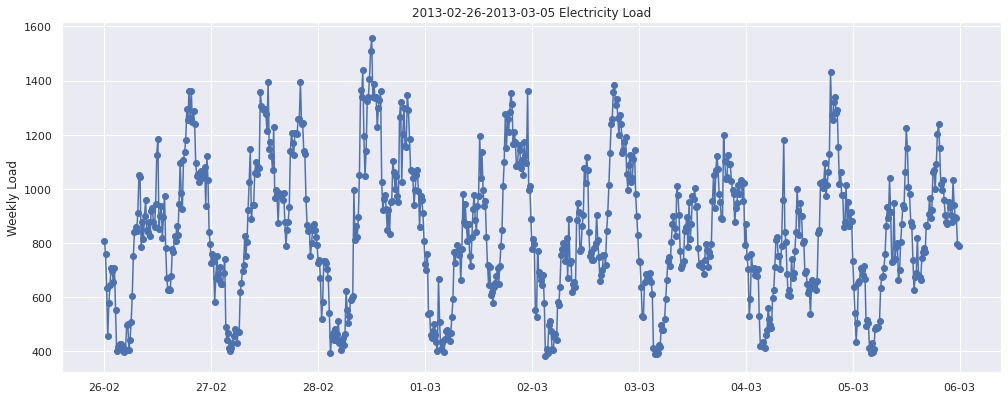

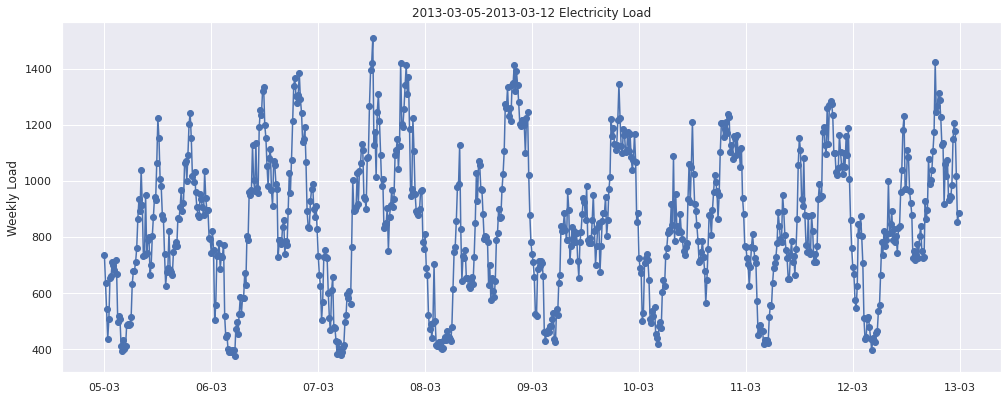

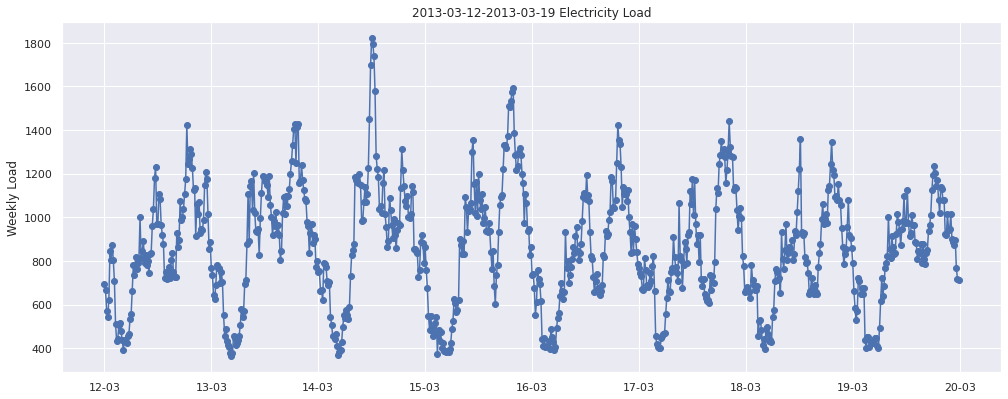

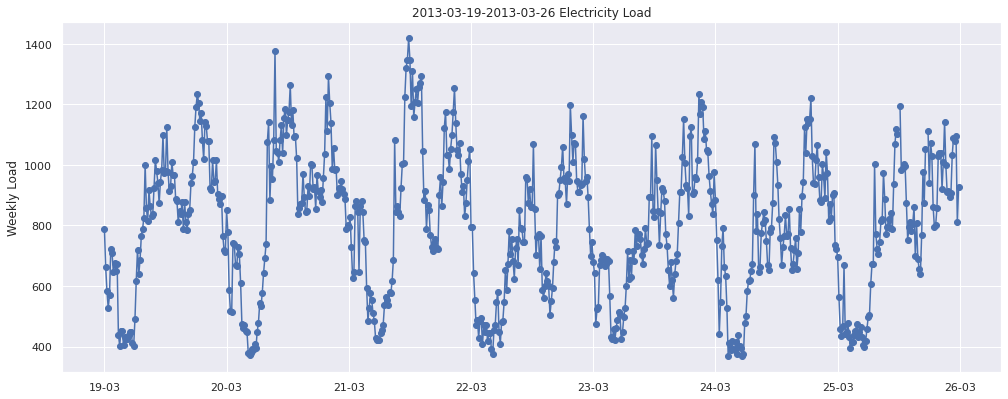

In [9]:
# Weekly Plot
date_range = (df.index.max()-df.index.min()).days
start_date = df.index.min().date()
dt = datetime(year=start_date.year, month=start_date.month, day=start_date.day, hour=0, minute=0, second=0)
days_in_week = 7
for index in range(0, date_range,days_in_week):
    if index==0:
        dt = datetime(year=start_date.year, month=start_date.month, day=start_date.day, hour=0, minute=0, second=0)
    else:
        dt = dt+ timedelta(days=days_in_week)
    dt2 = dt + timedelta(days=days_in_week)+timedelta(hours=23, minutes=45, seconds=0)
    #start = dt.strftime("%d-%b-%Y (%H:%M:%S.%f)")
    start = f'{dt:%Y-%m-%d}'
    end = f'{dt2:%Y-%m-%d}'
    print(start, end)
    fig, ax = plt.subplots()
    ax.plot(df.loc[start:end, 'Load'], marker='o', linestyle='-')
    ax.set_ylabel('Weekly Load')
    ax.set_title(f'{start}-{end} Electricity Load')
    # Set x-axis major ticks to weekly interval, on Mondays
    #ax.xaxis.set_major_locator(mdates.WeekdayLocator(byweekday=mdates.MONDAY))
    # Format x-tick labels as 3-letter month name and day number
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m'));

## Daily Plots

Patterns are clearly visible in daily load graphs. These graphs show a kind of follow a pattern and you can see there is high load around 11:30AM-01:30PM and around 18:00PM
For this time-series, for one year data there might be some seasonal pattern along with cyclical trends.

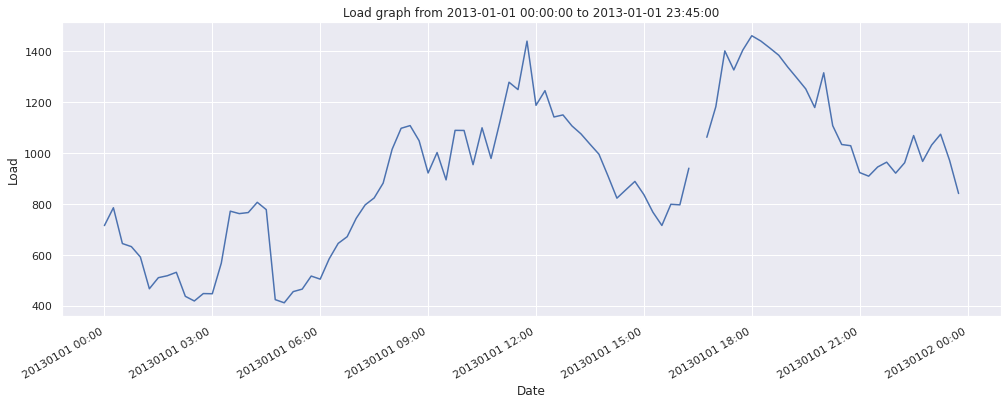

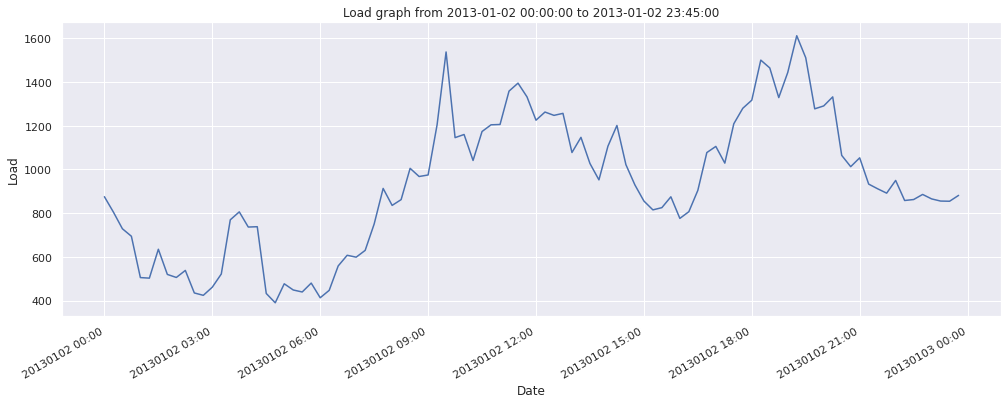

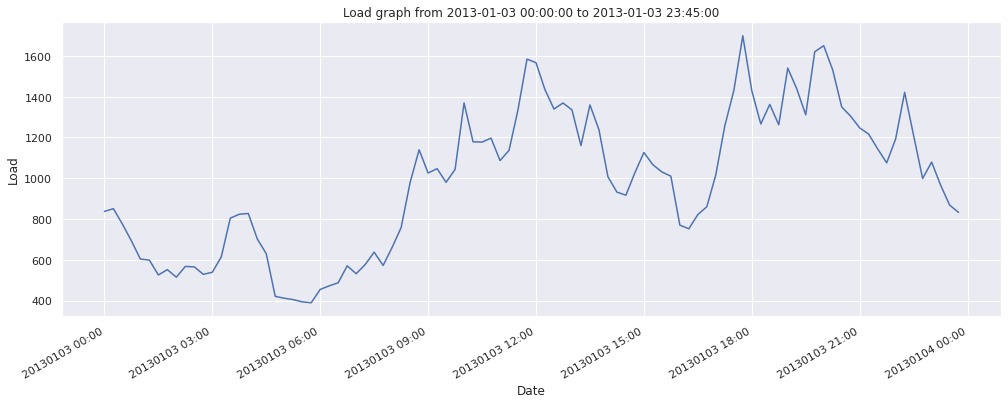

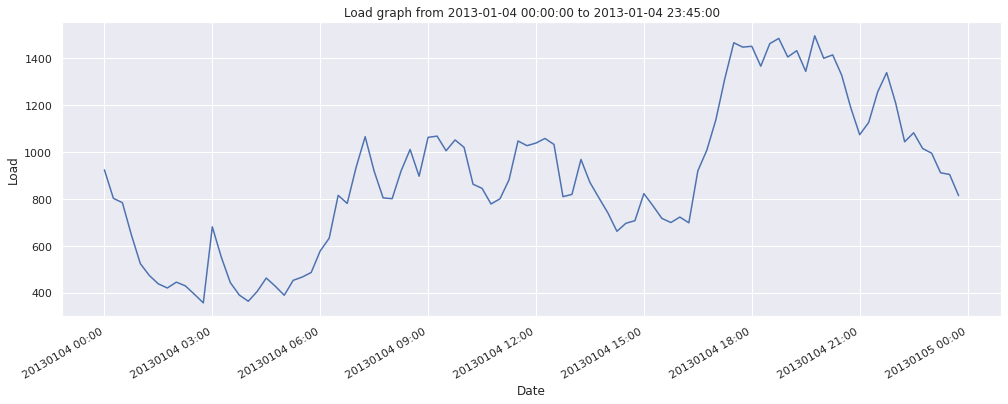

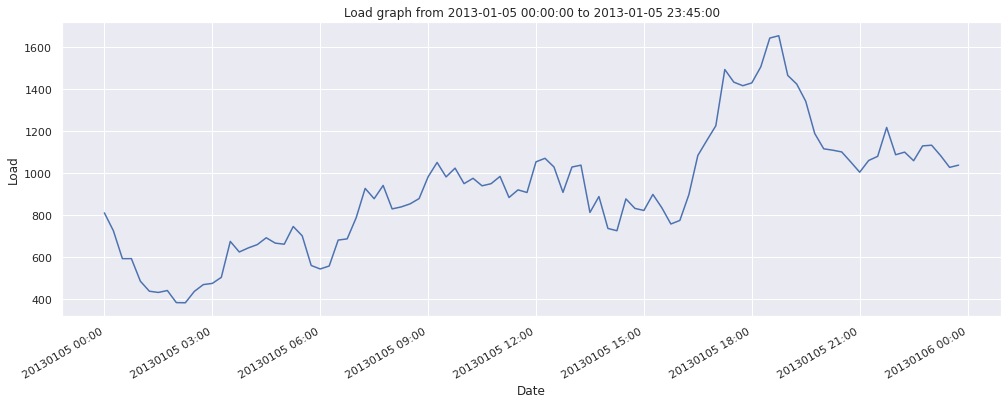

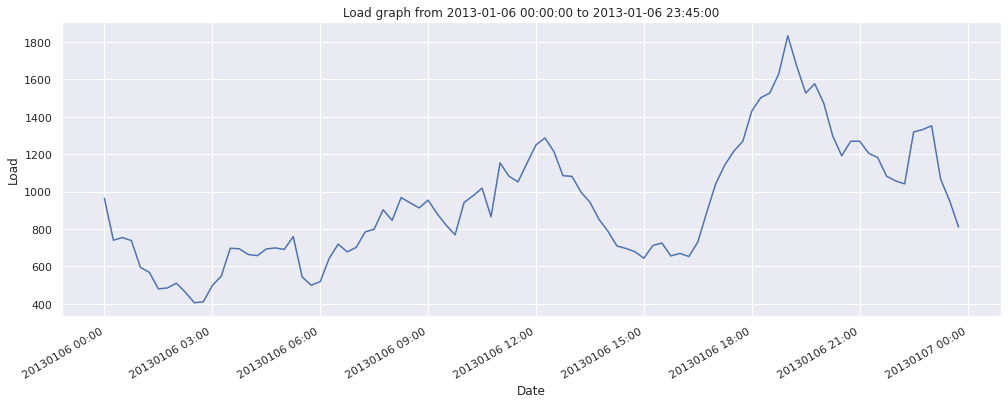

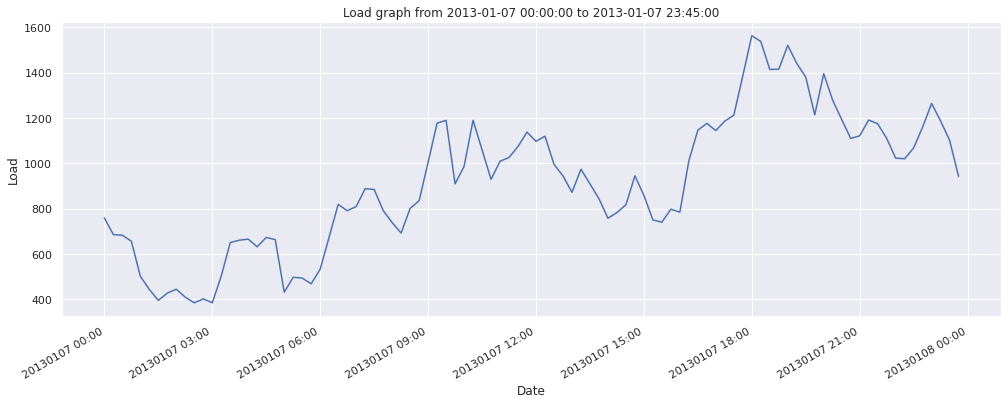

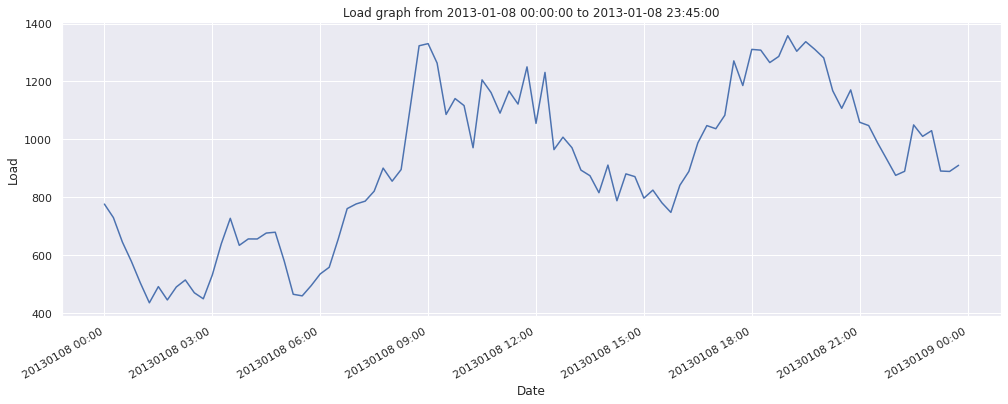

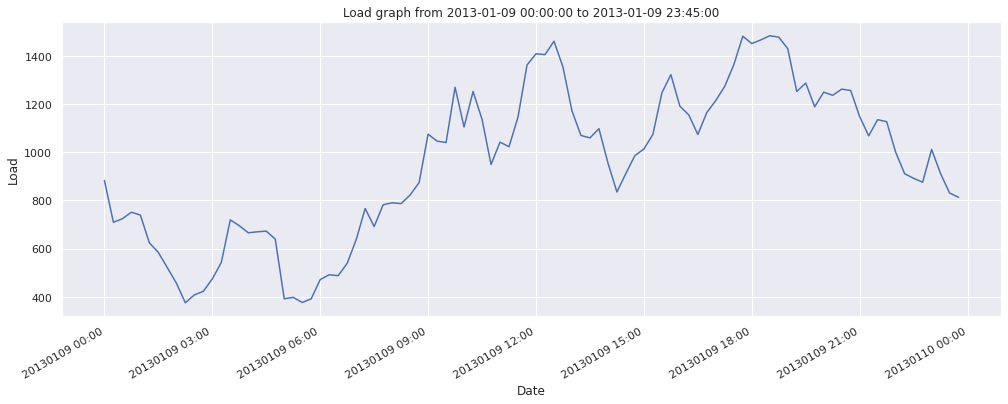

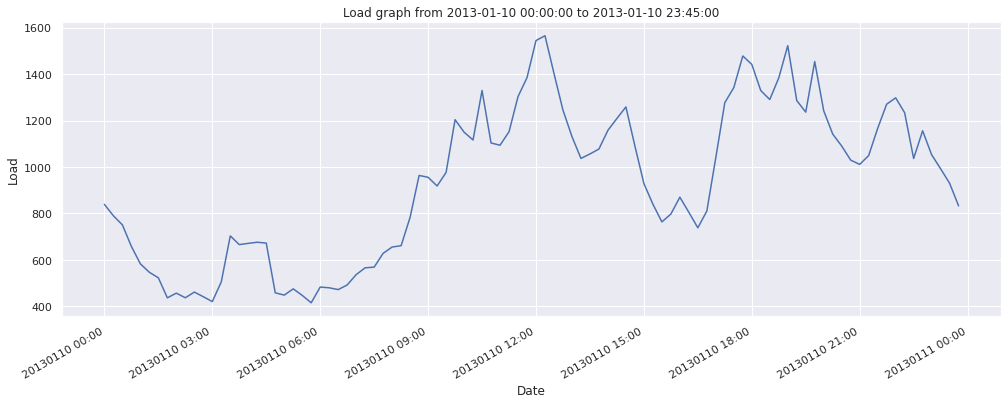

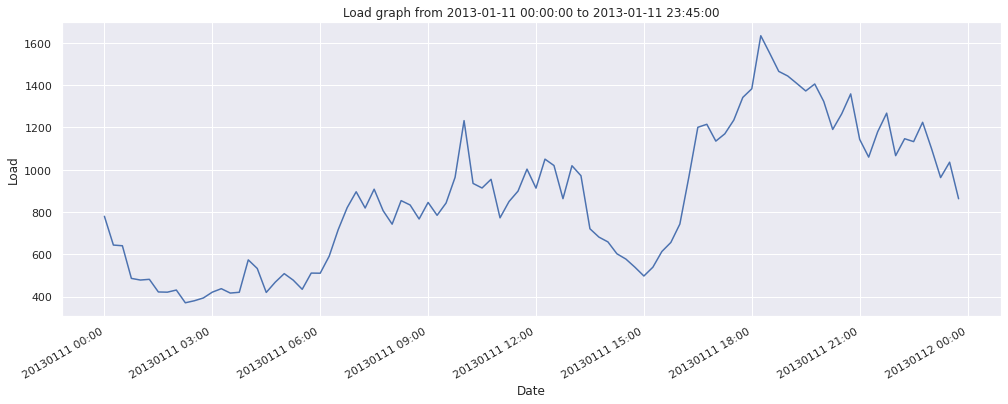

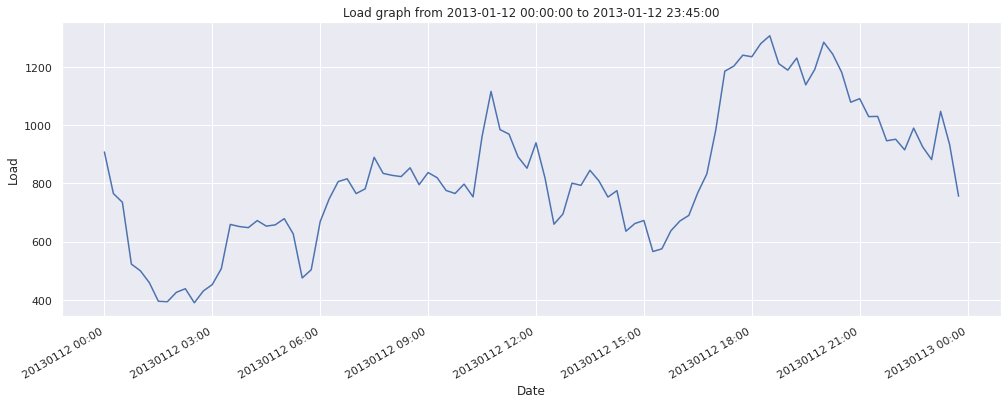

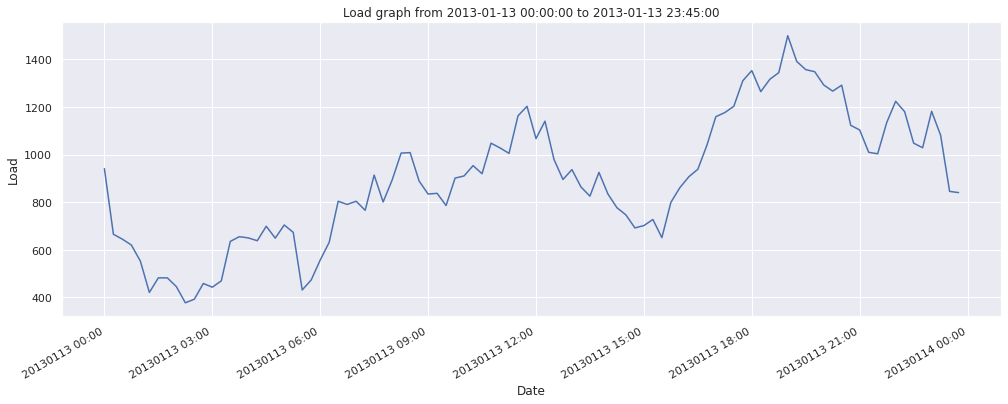

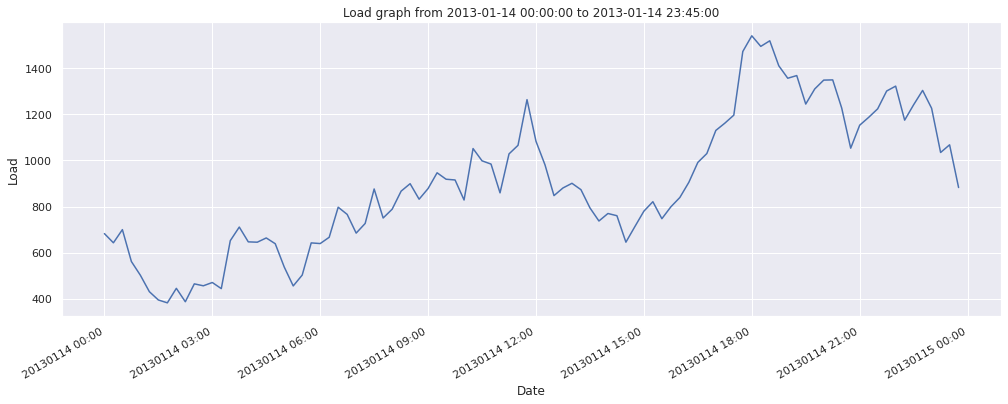

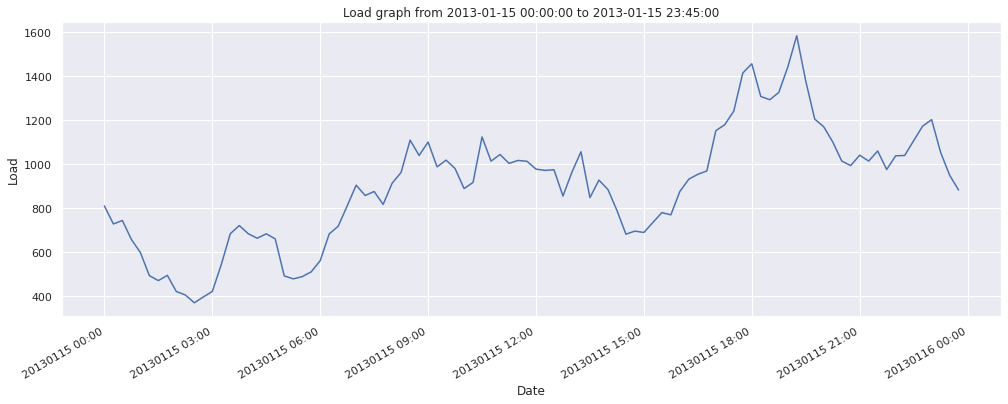

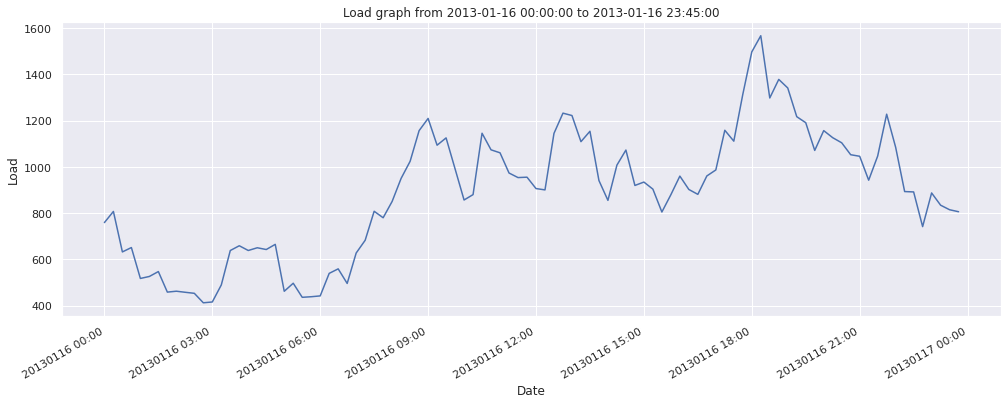

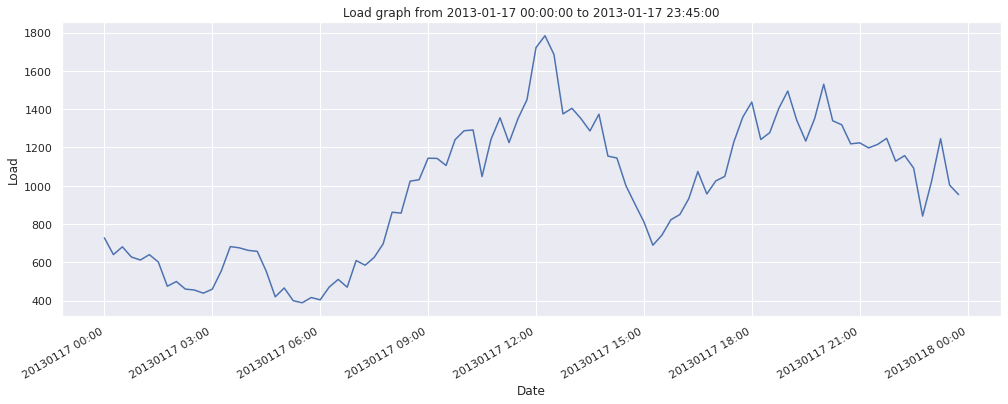

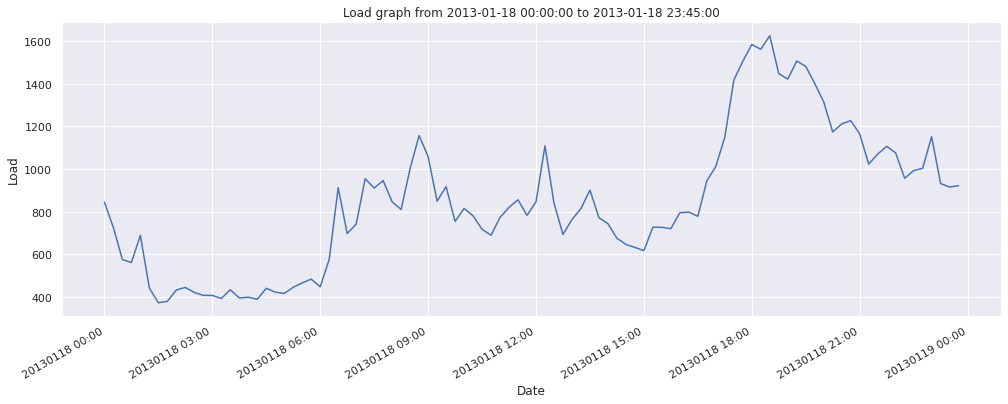

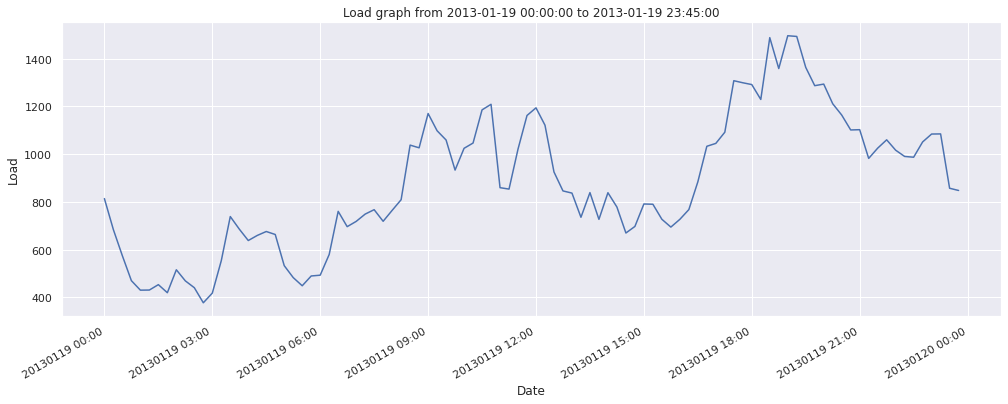

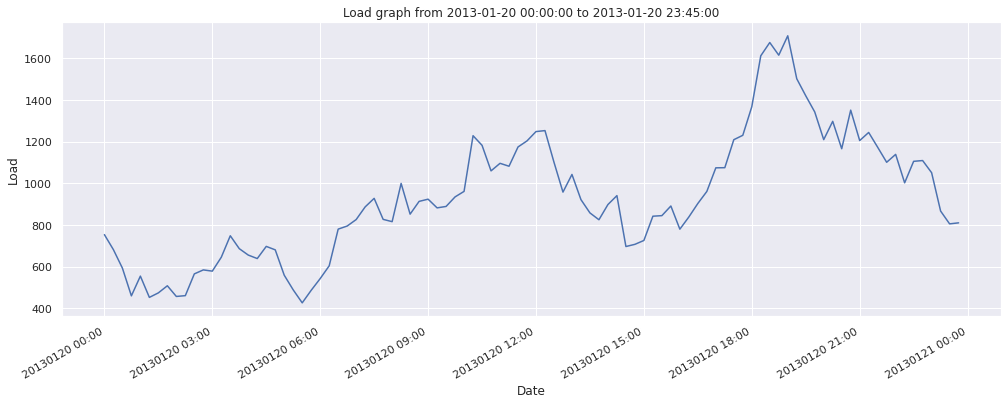

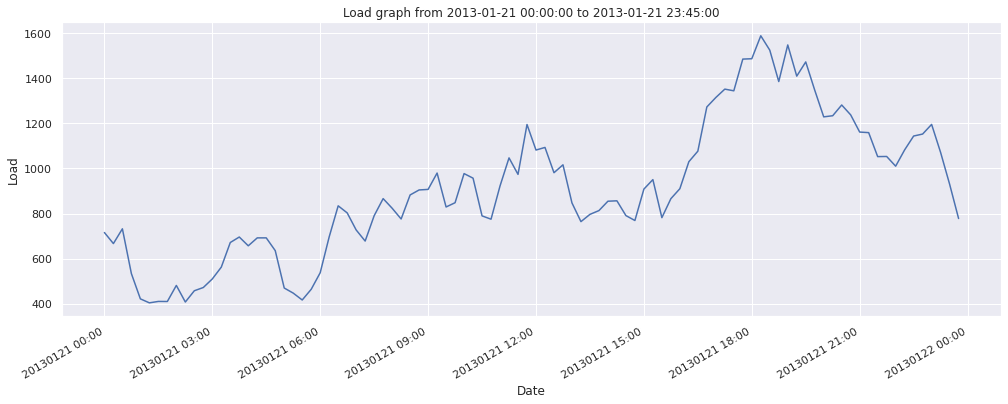

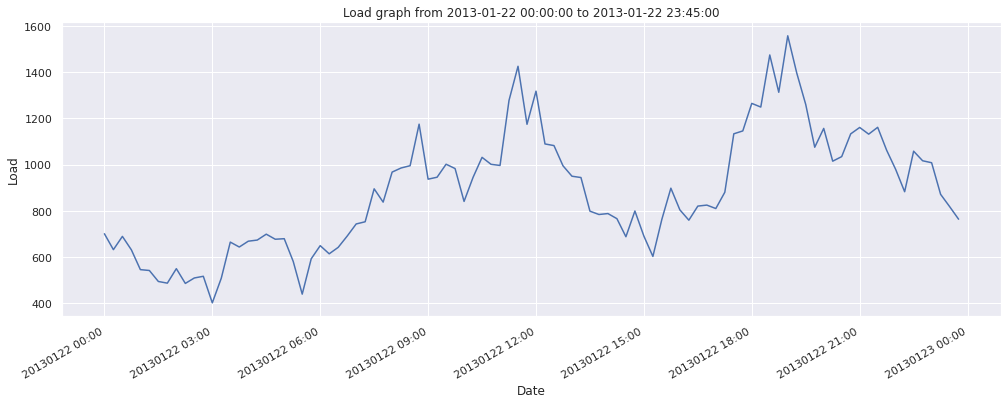

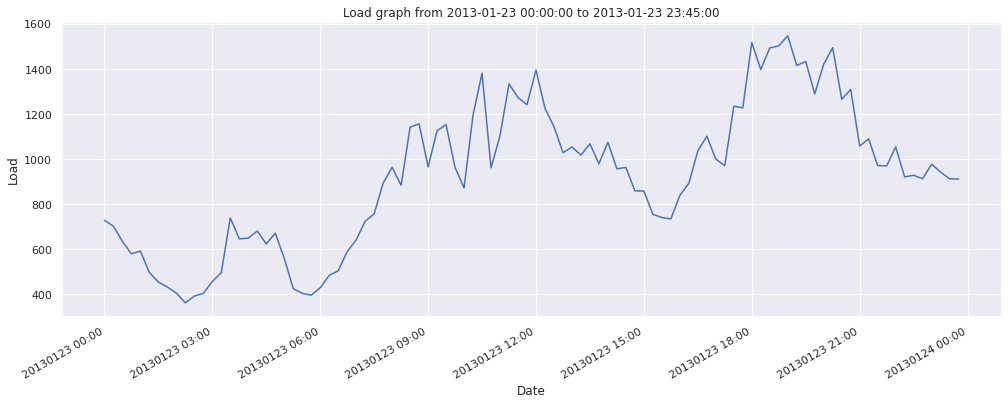

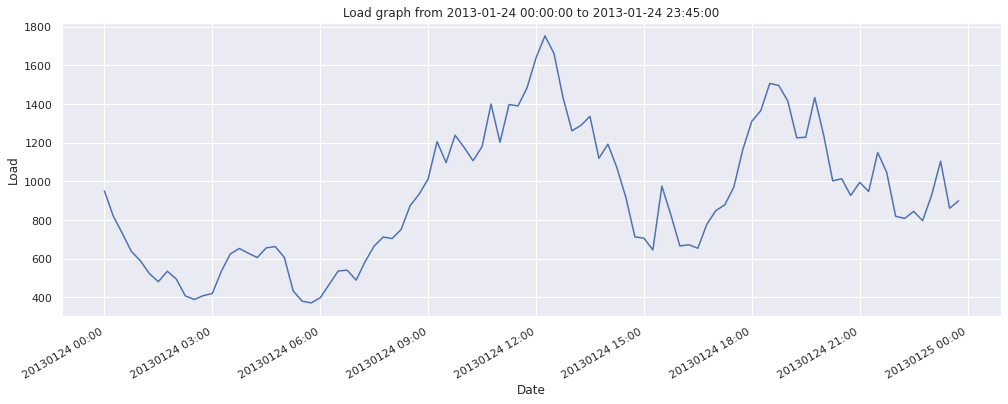

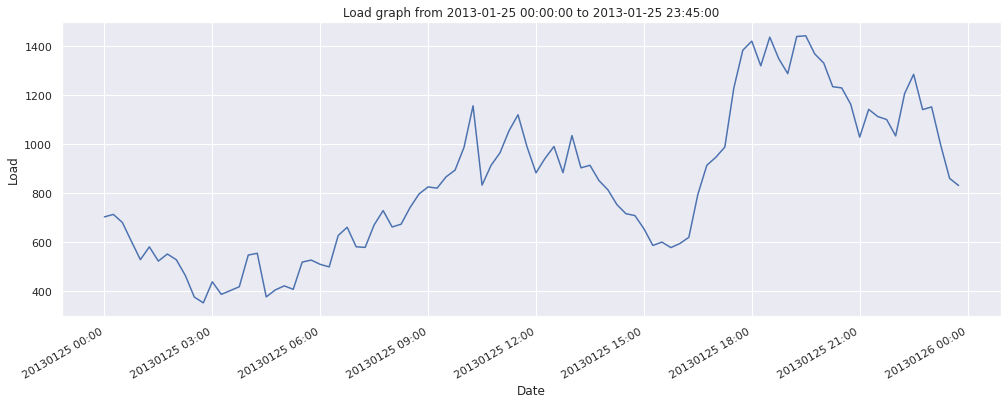

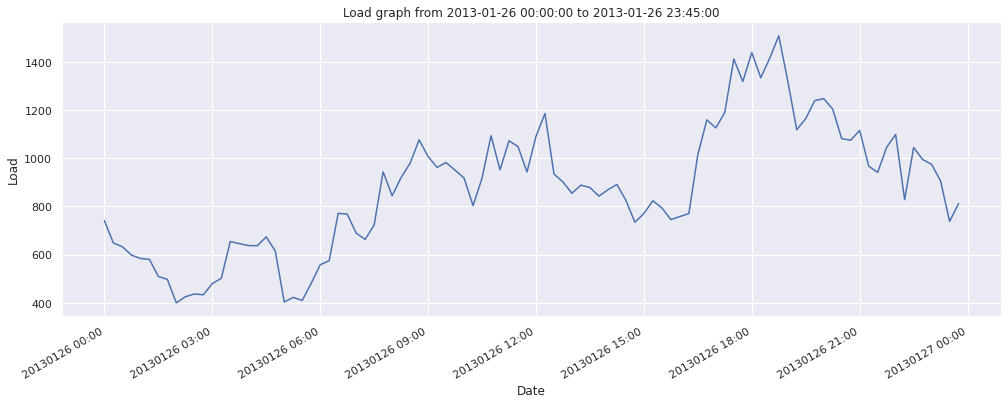

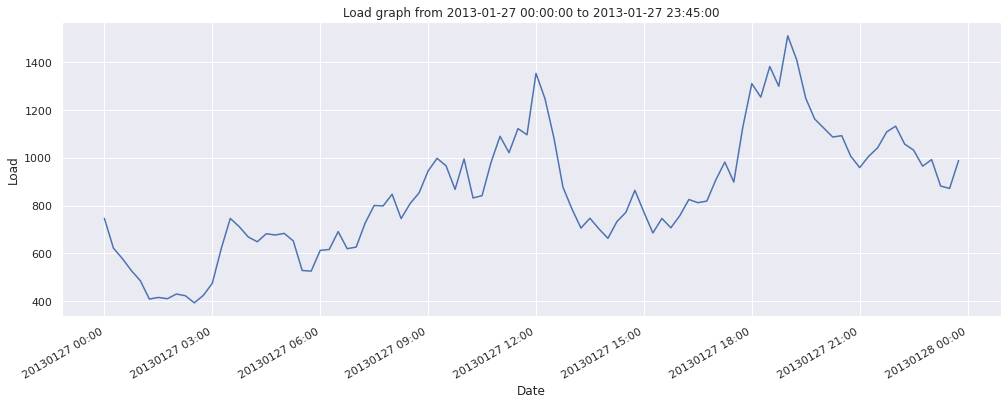

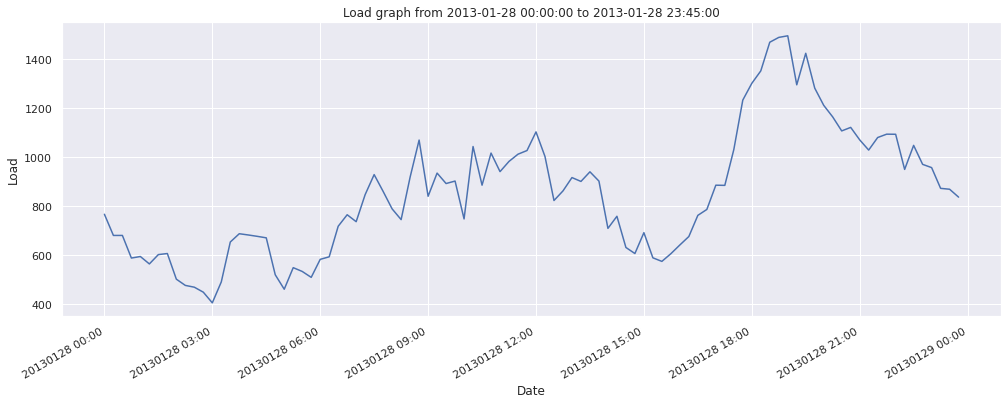

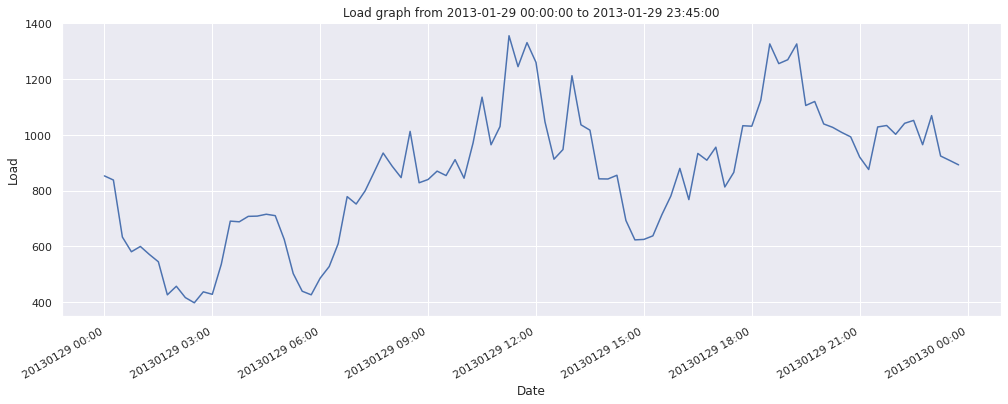

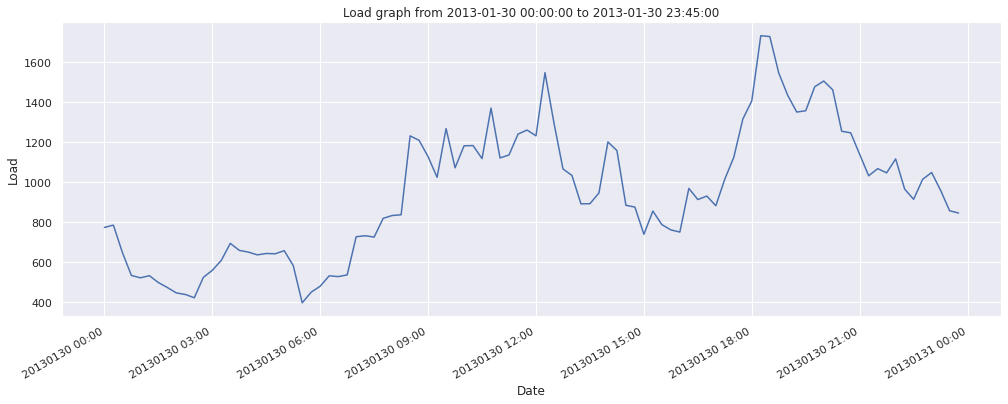

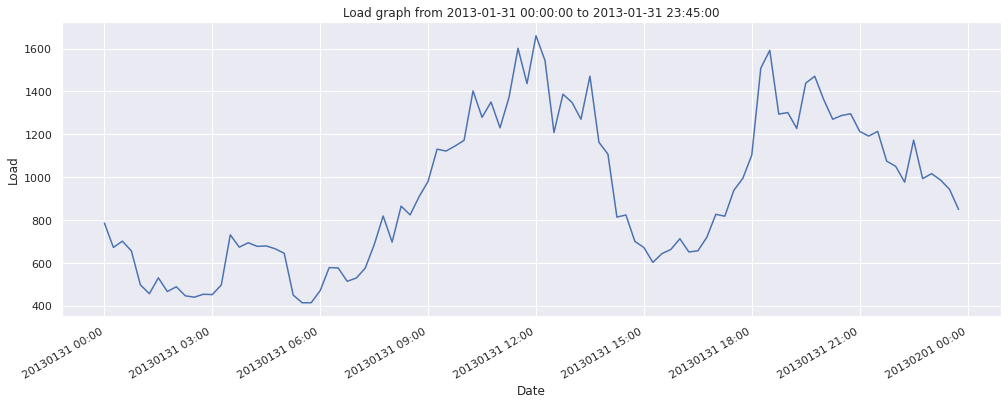

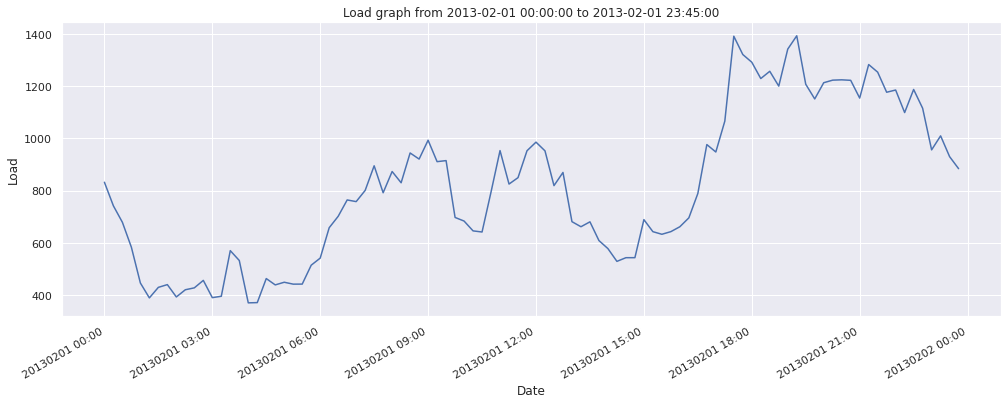

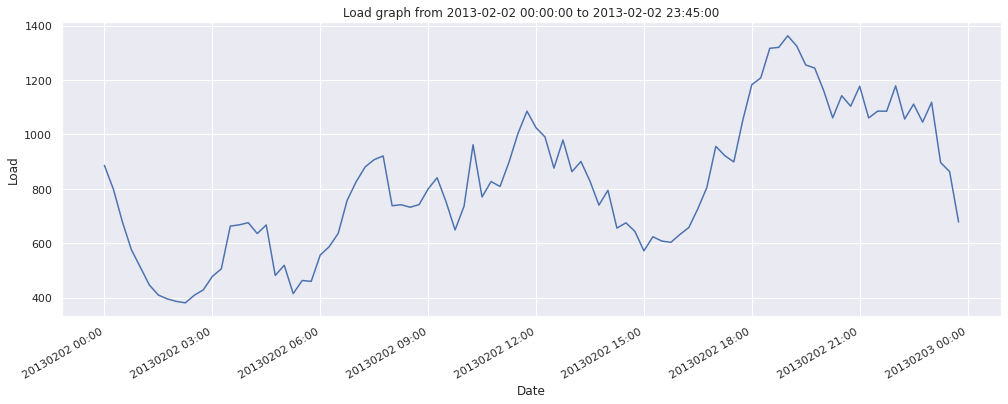

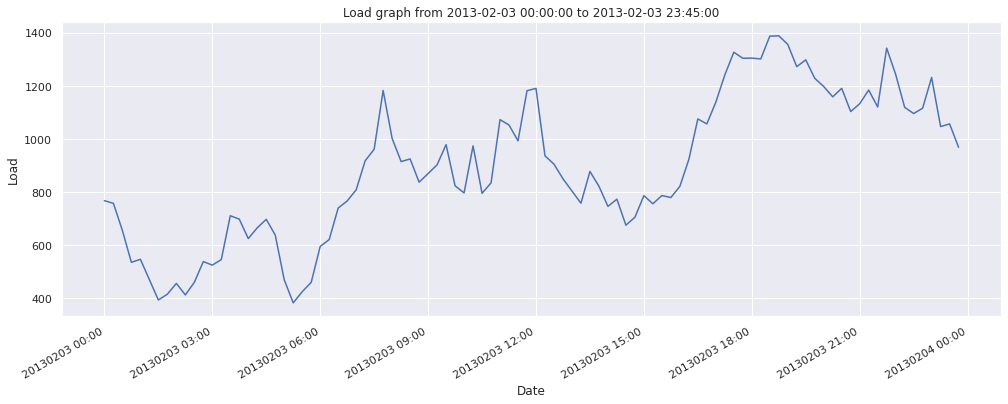

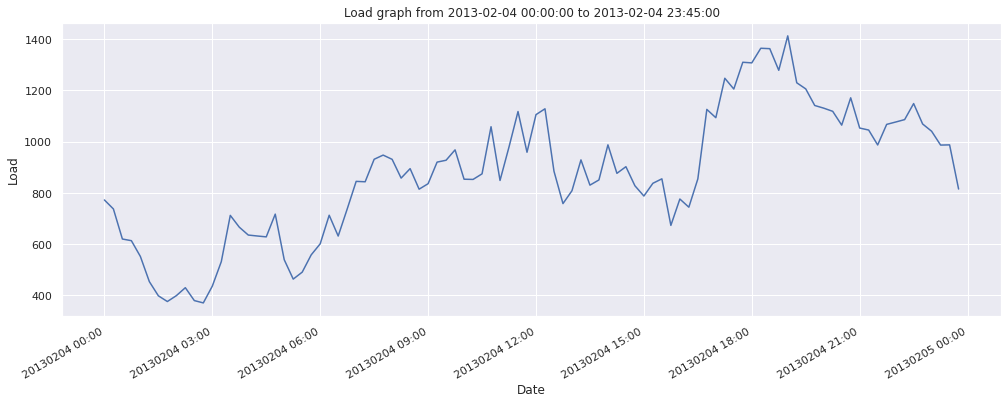

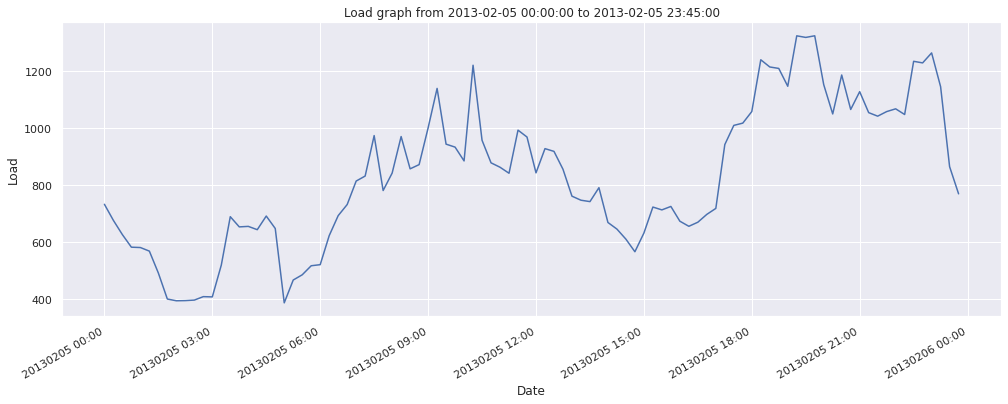

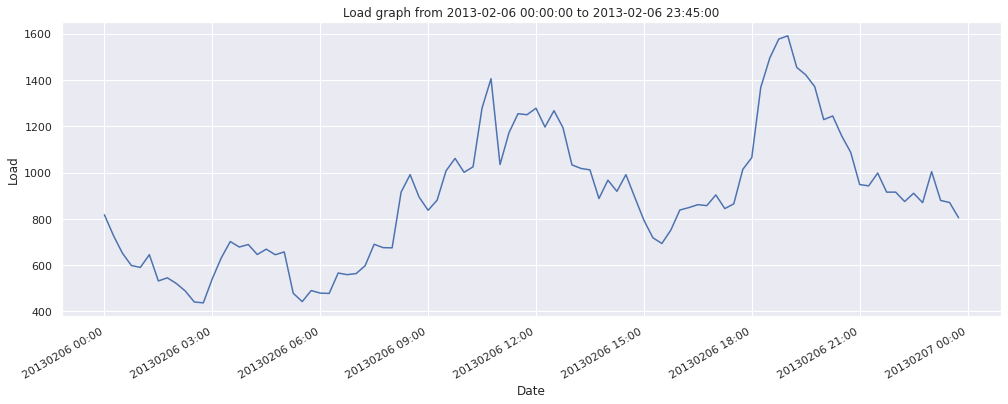

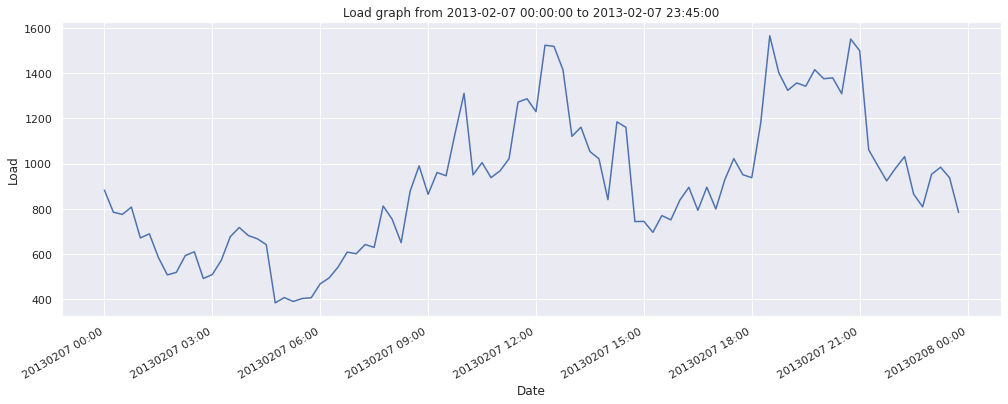

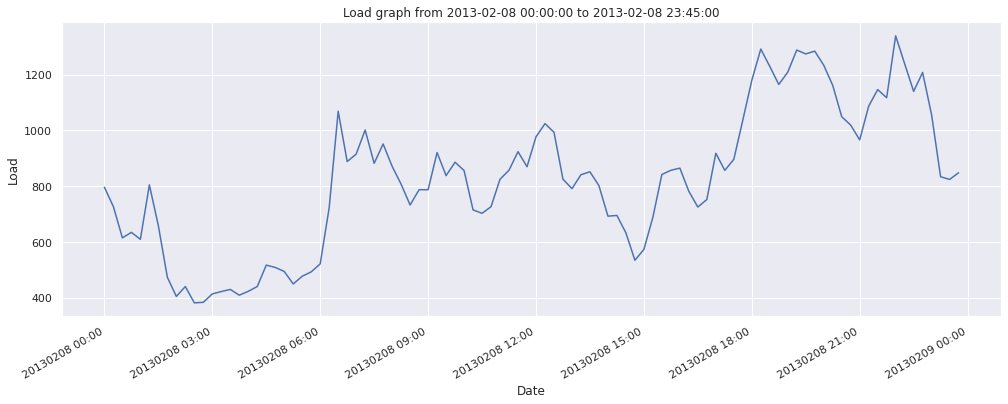

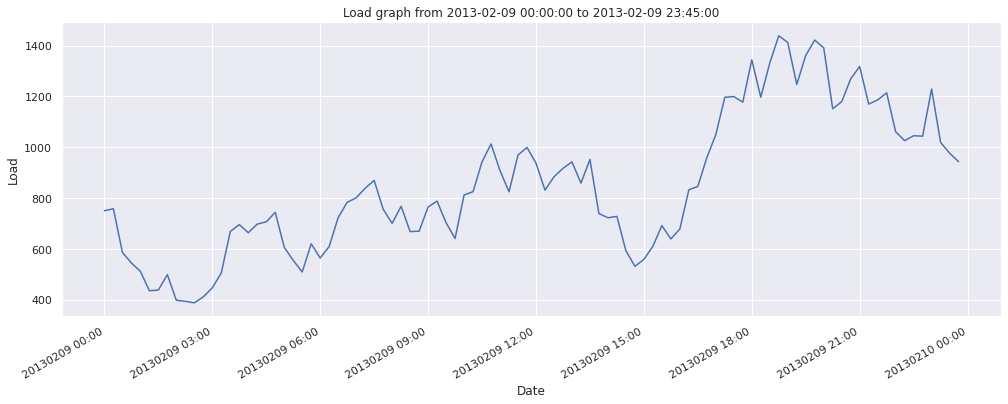

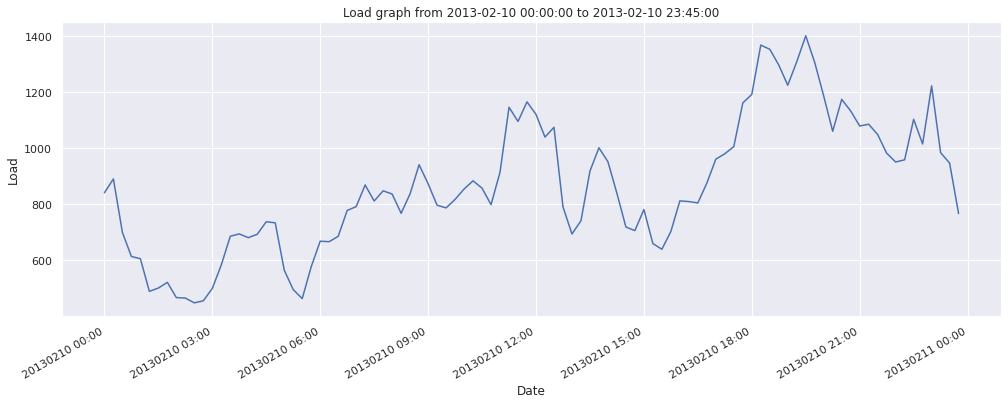

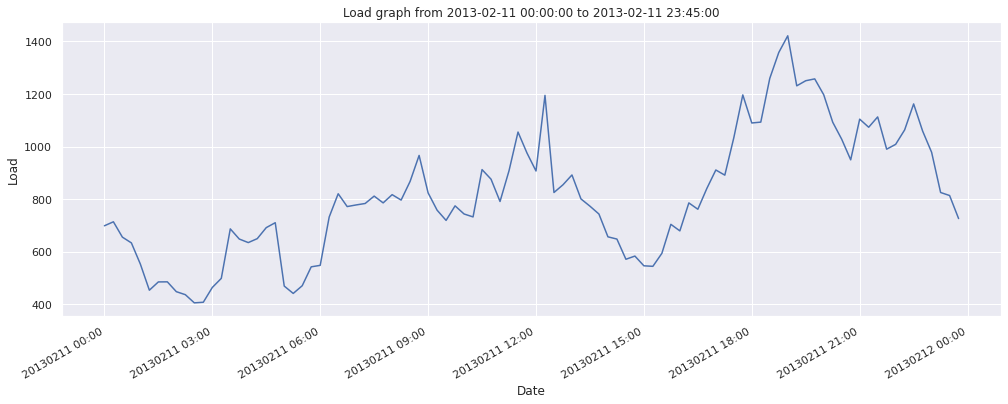

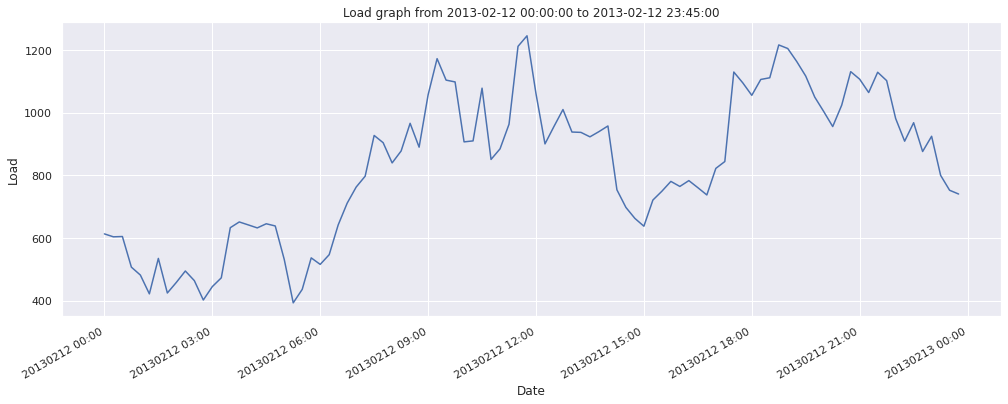

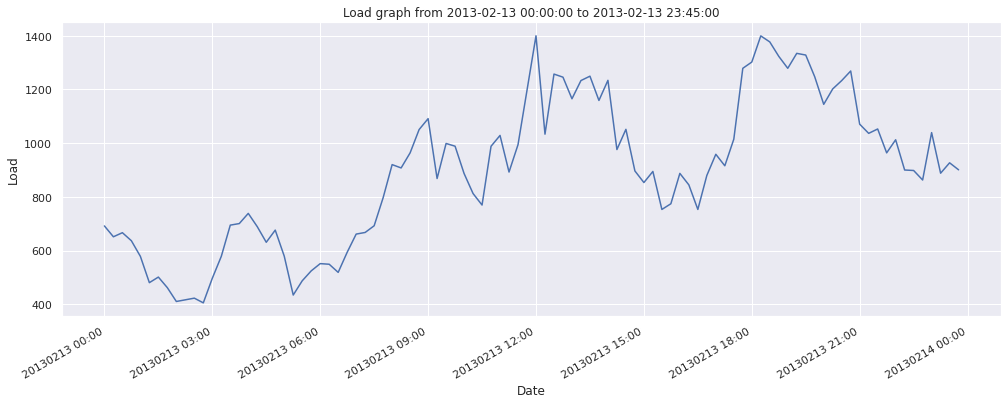

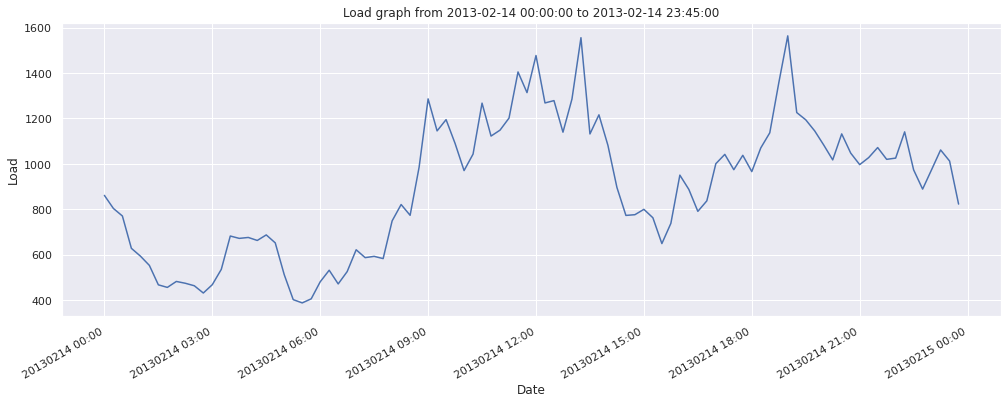

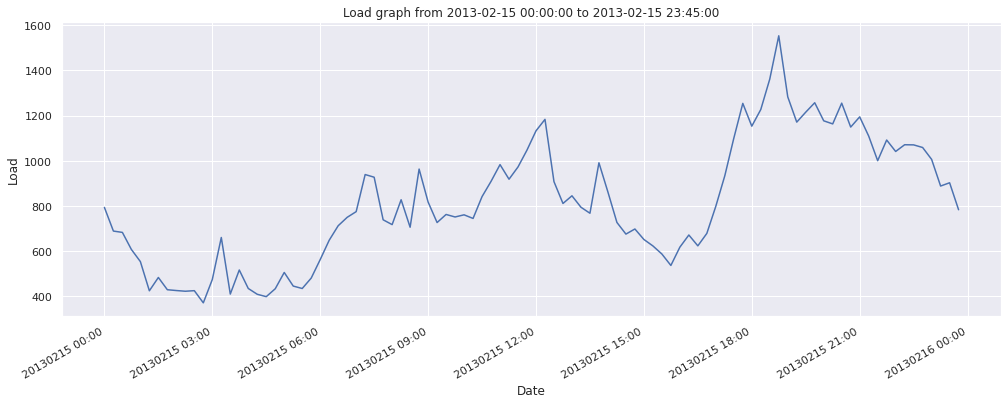

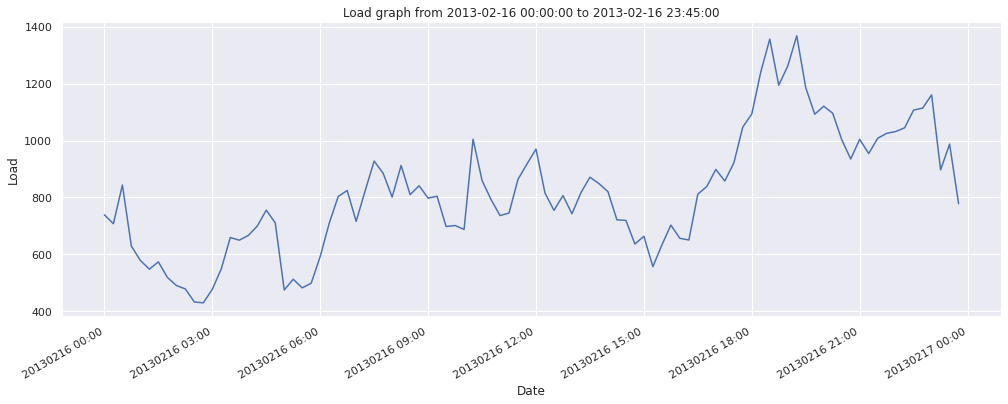

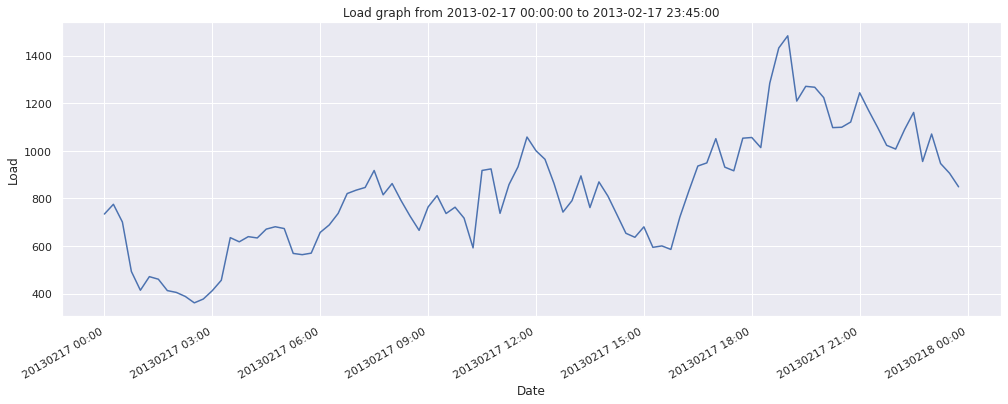

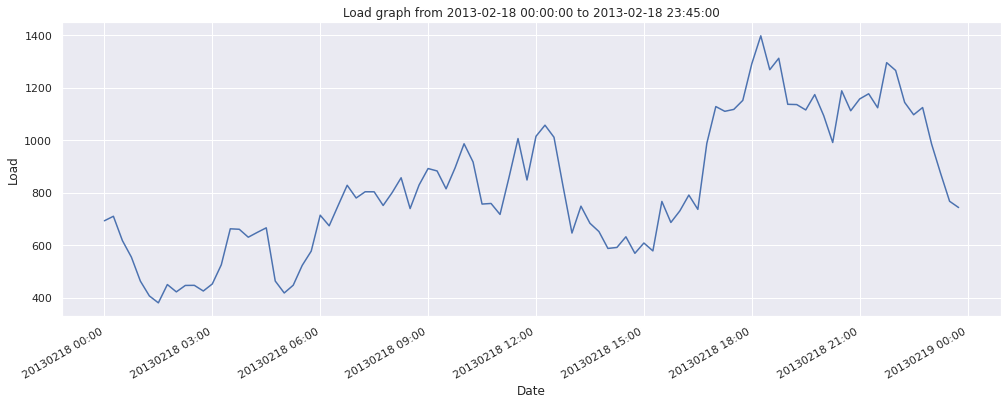

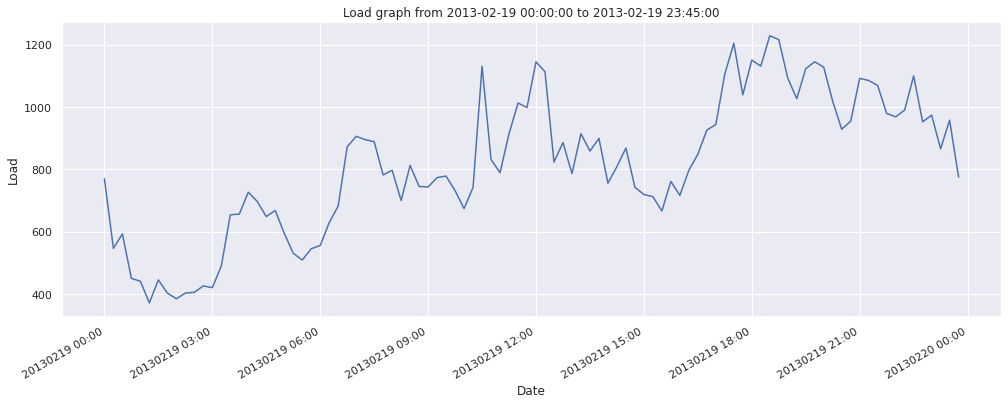

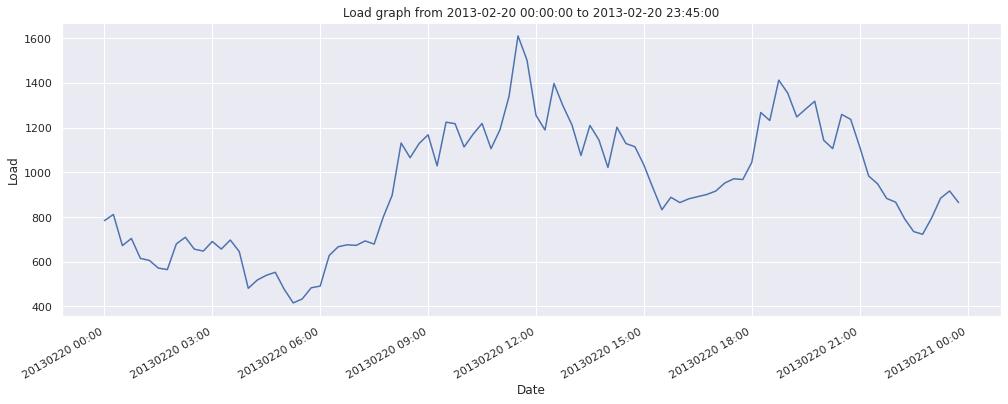

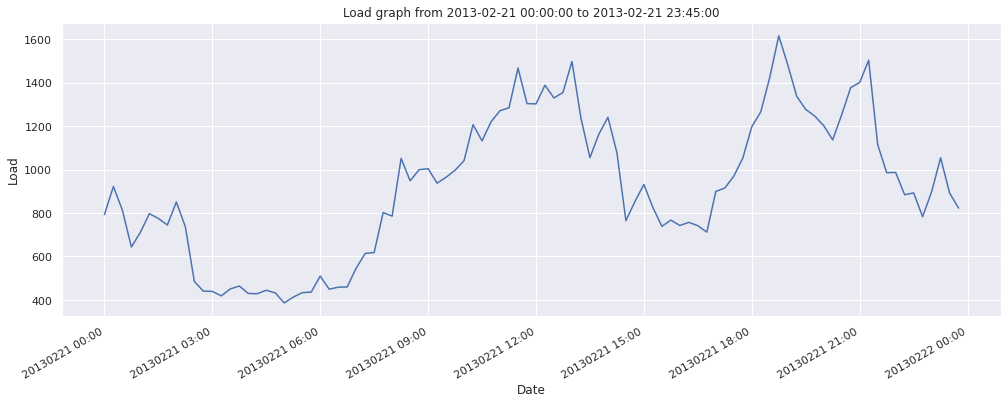

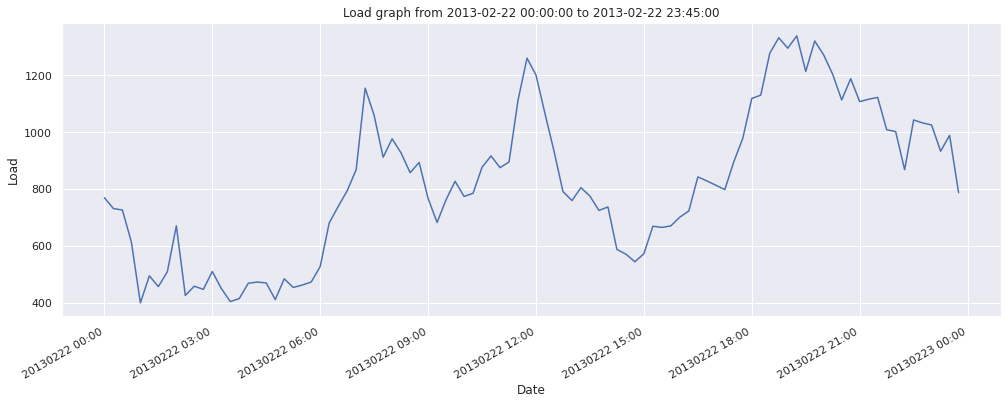

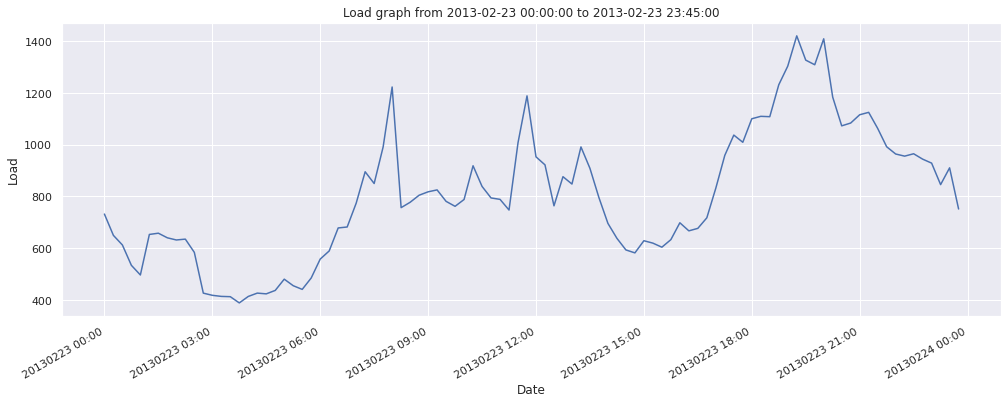

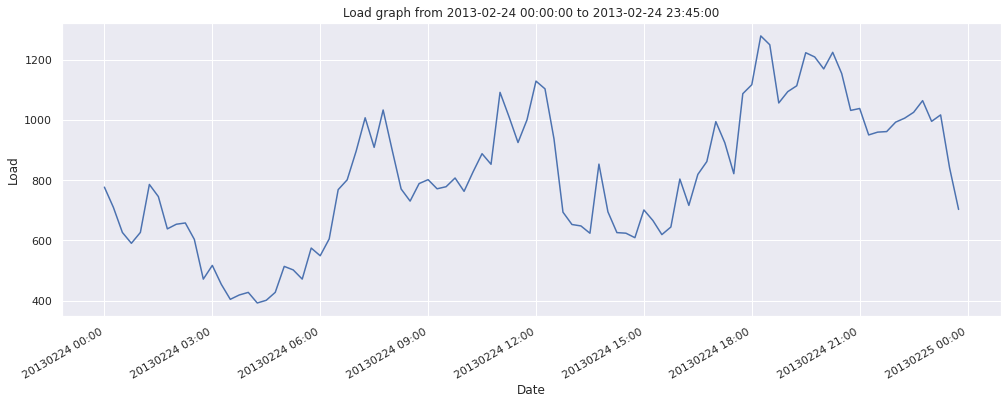

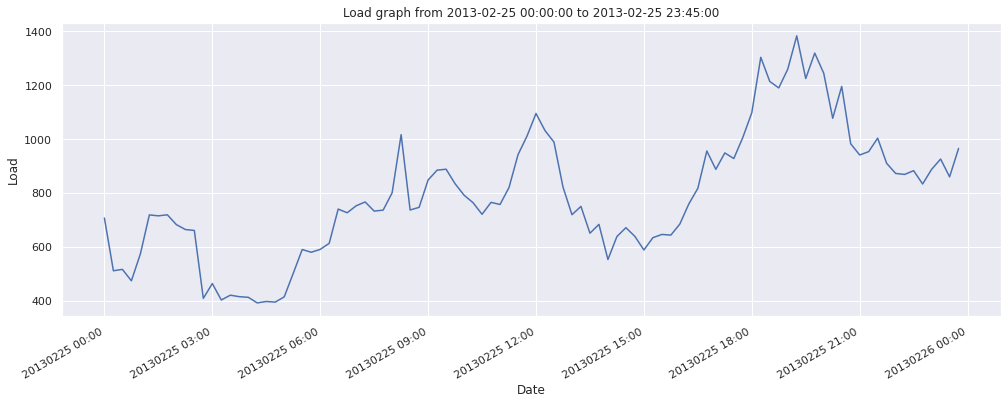

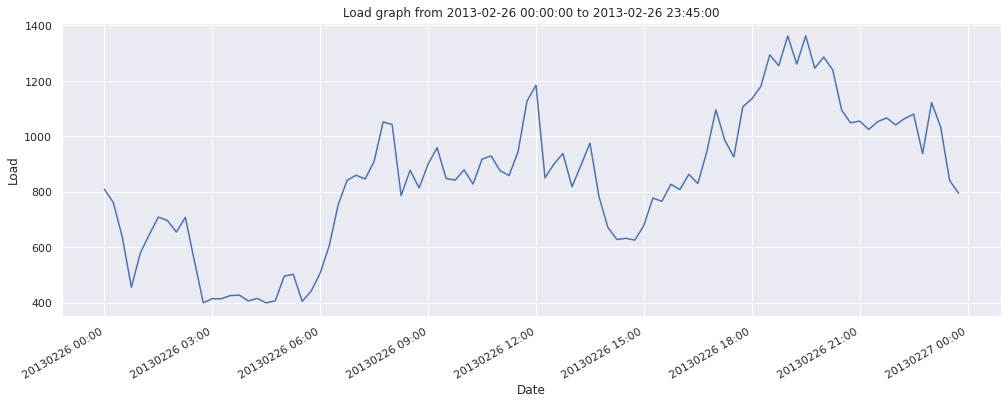

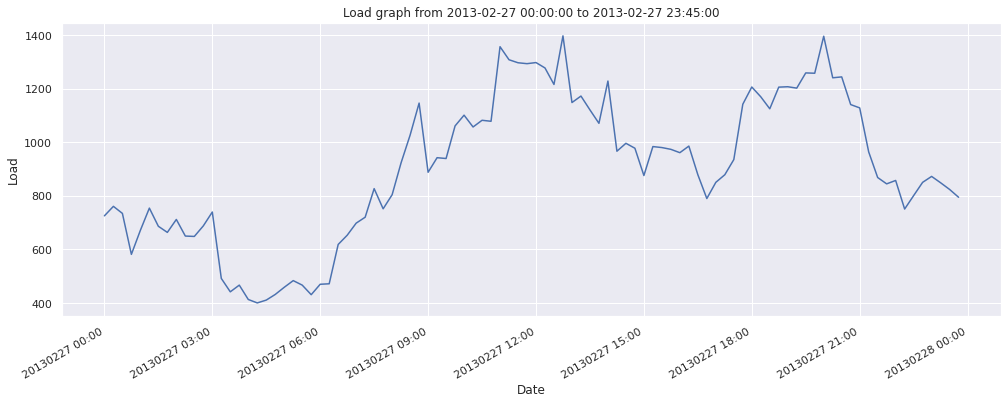

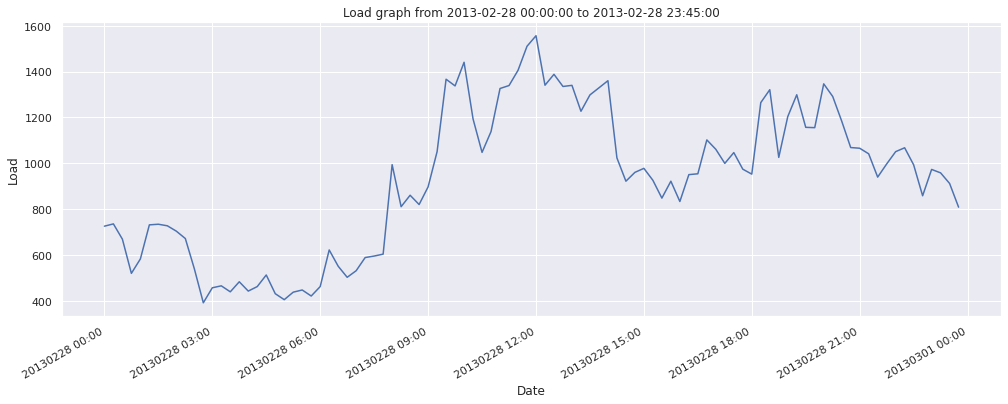

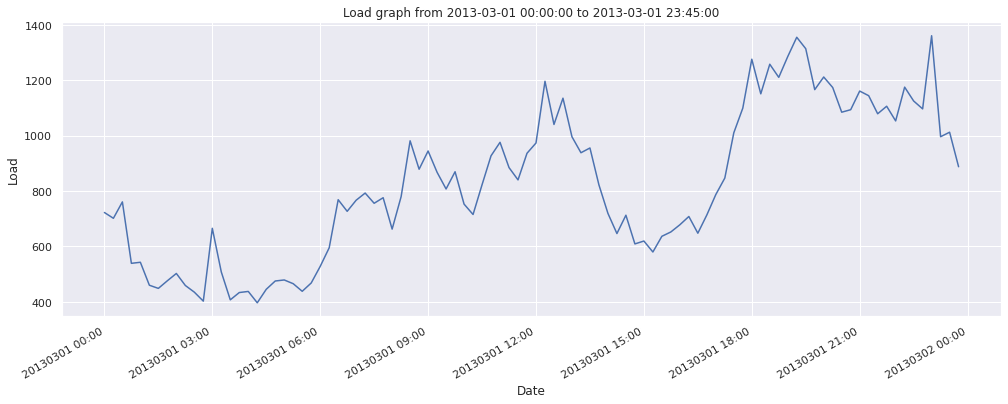

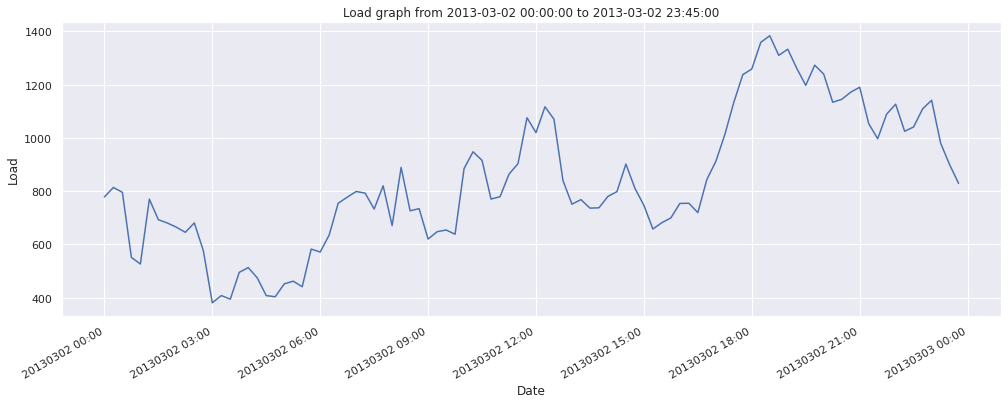

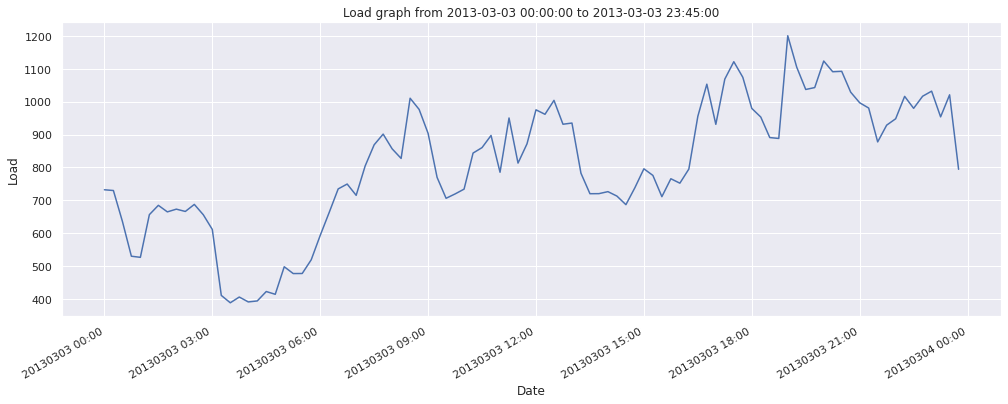

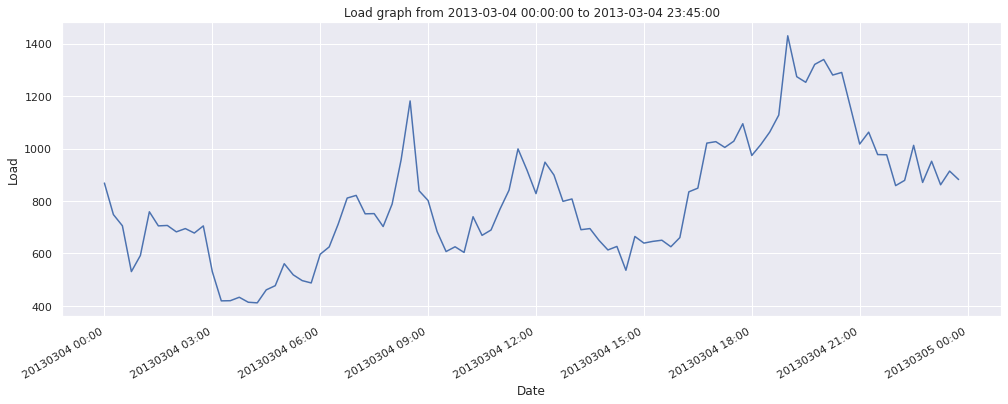

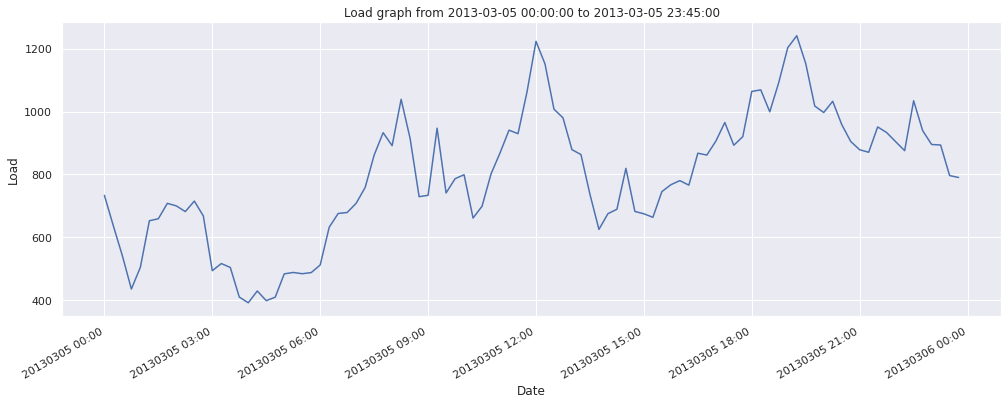

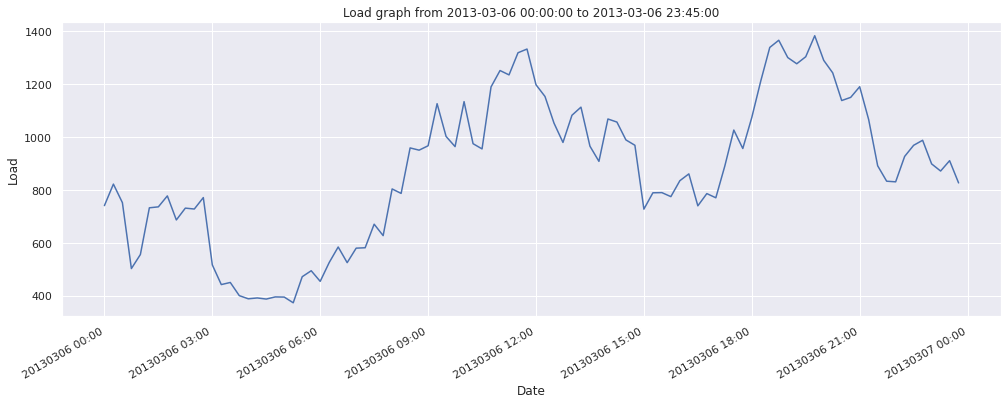

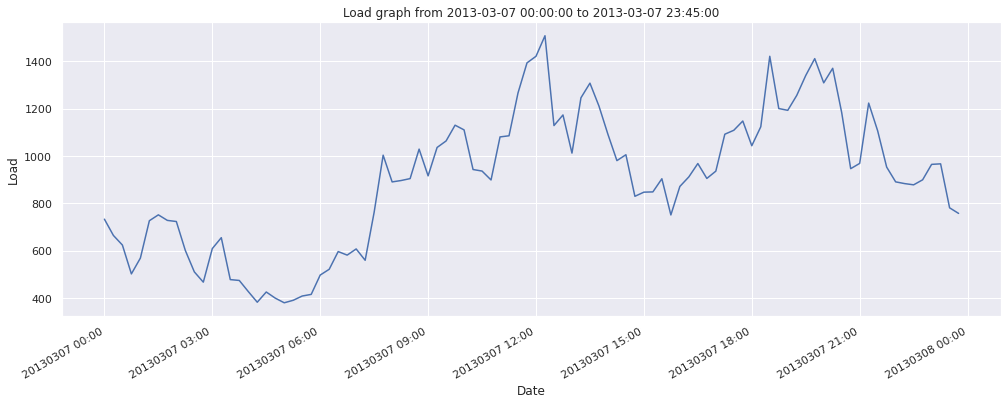

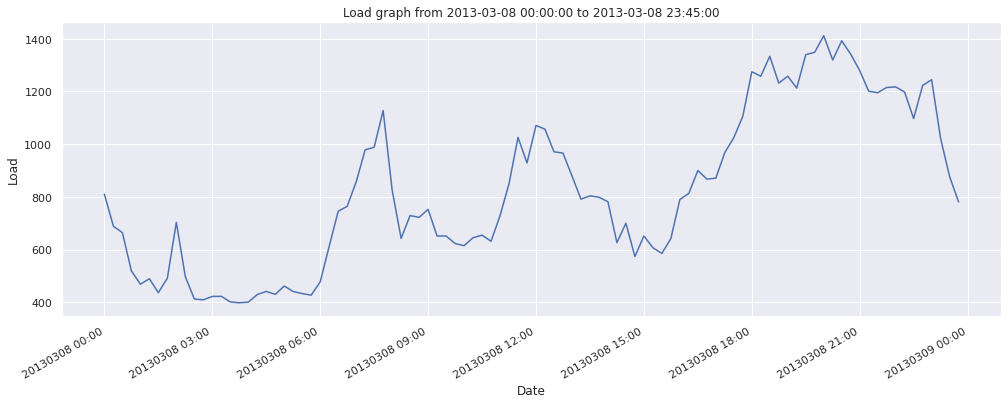

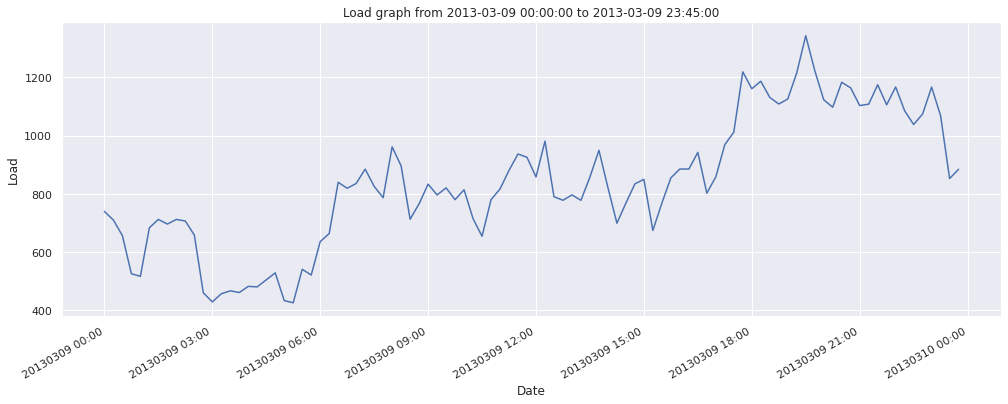

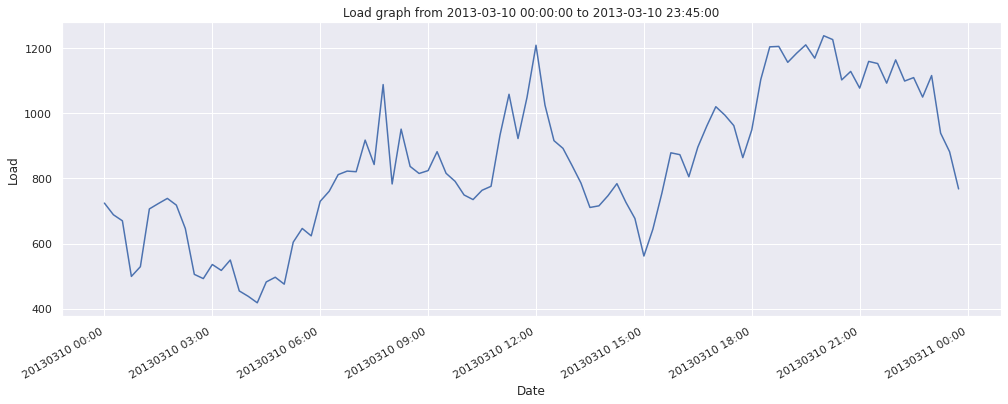

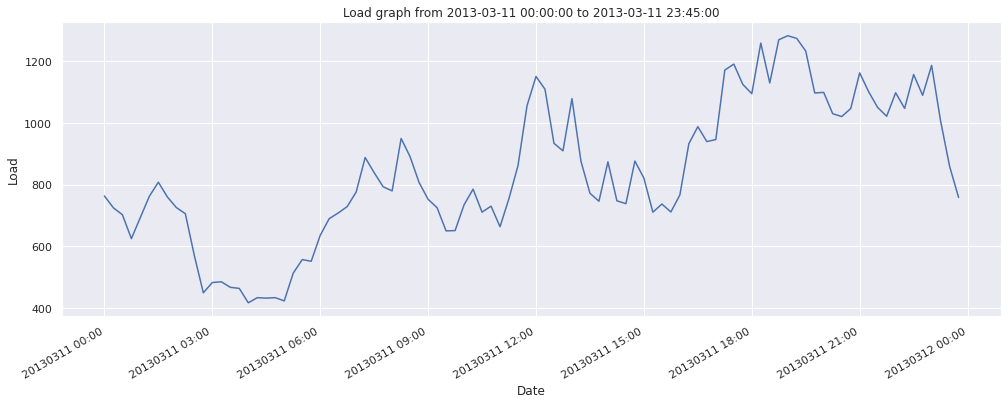

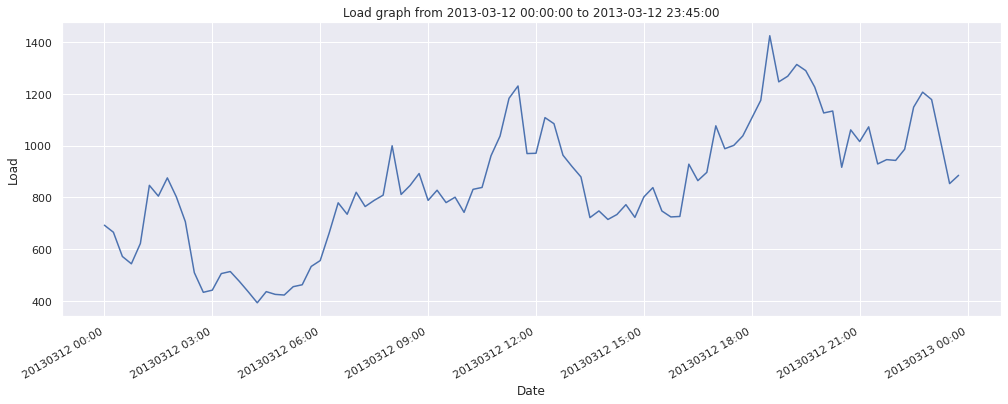

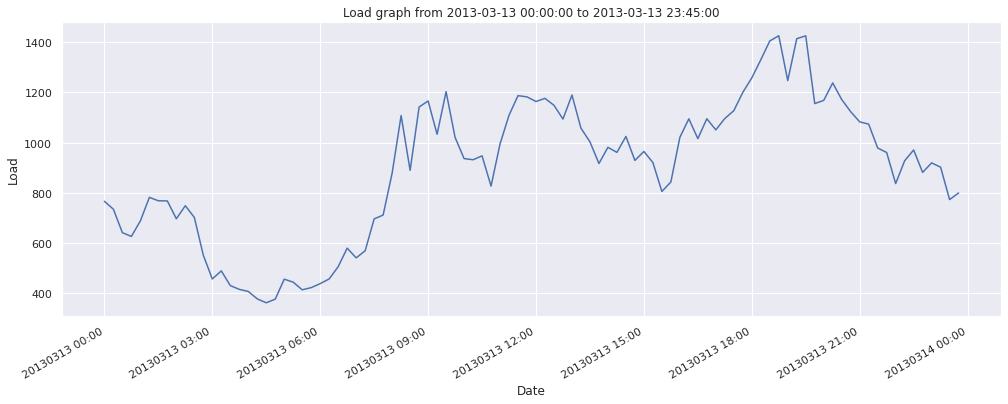

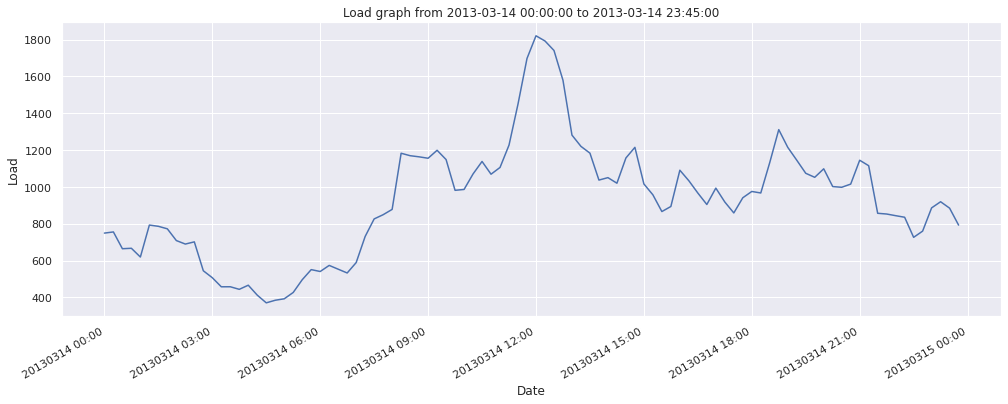

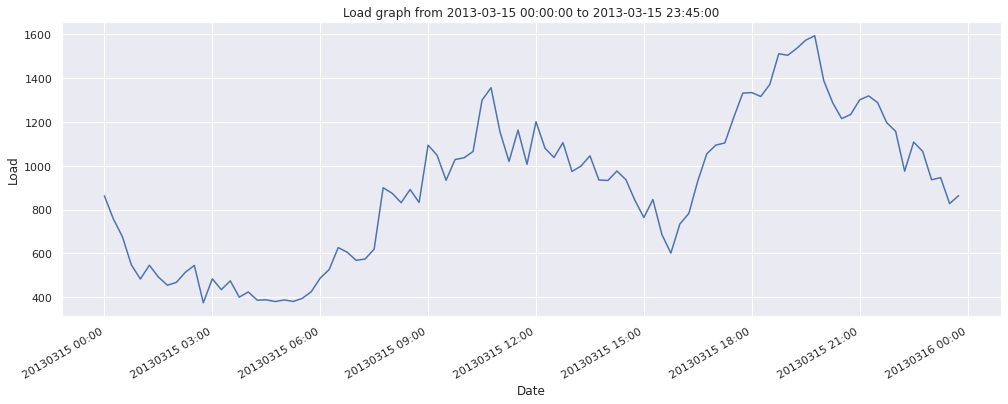

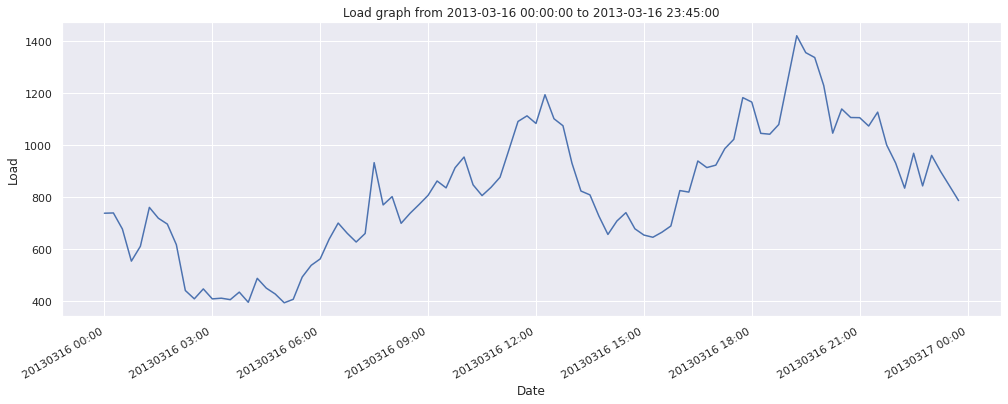

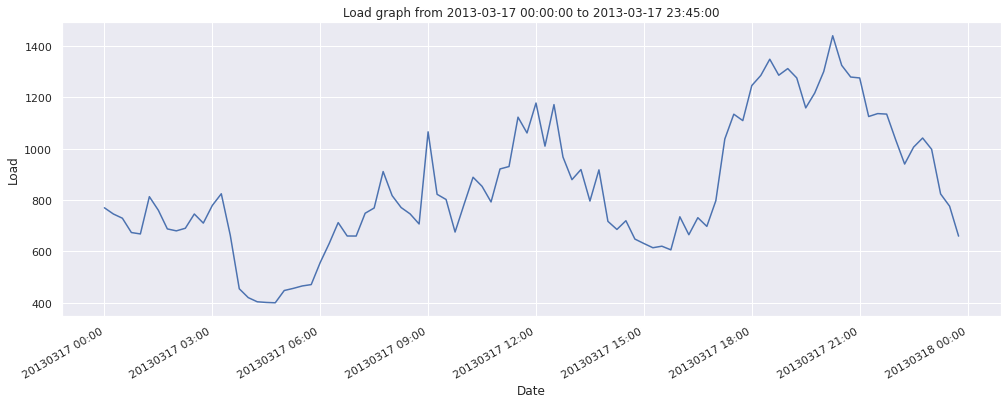

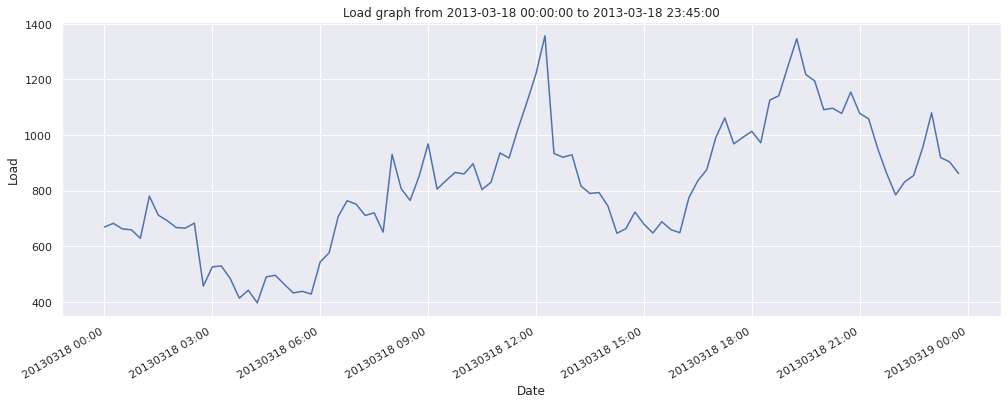

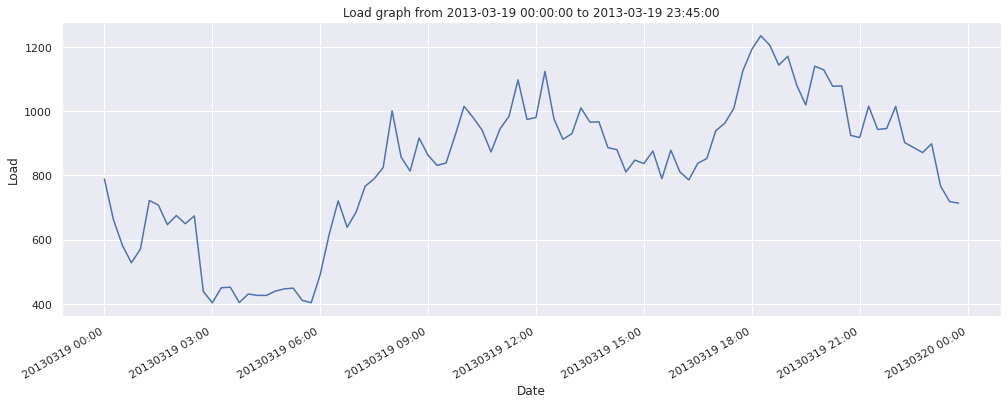

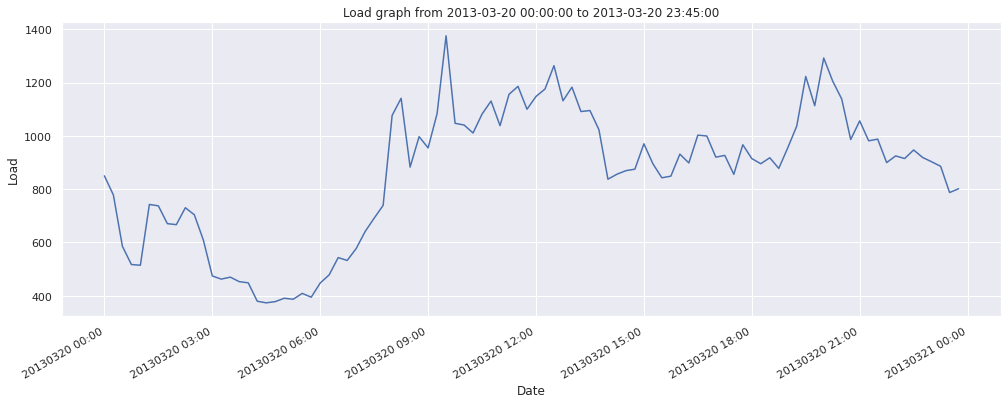

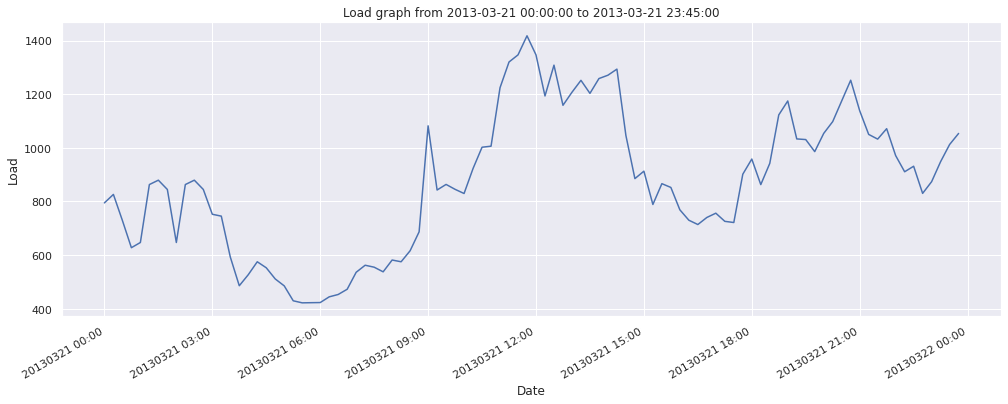

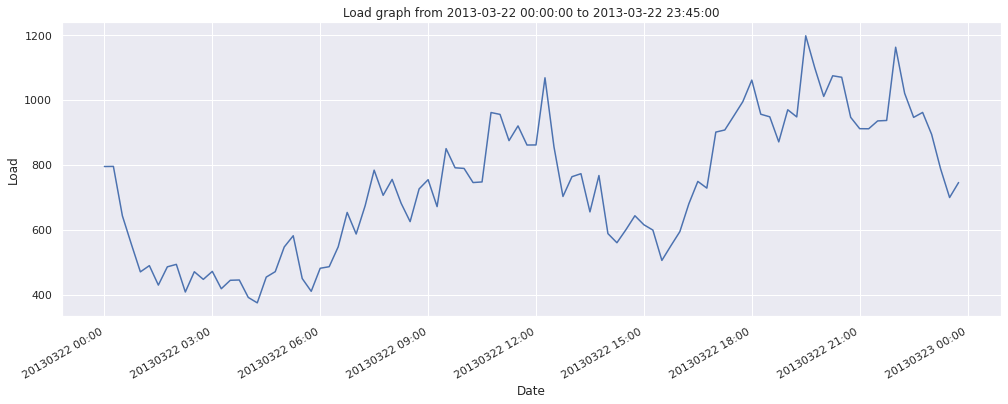

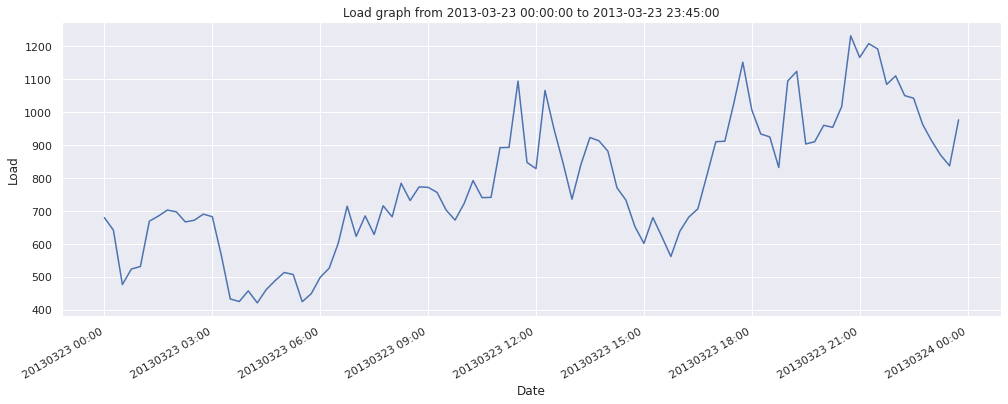

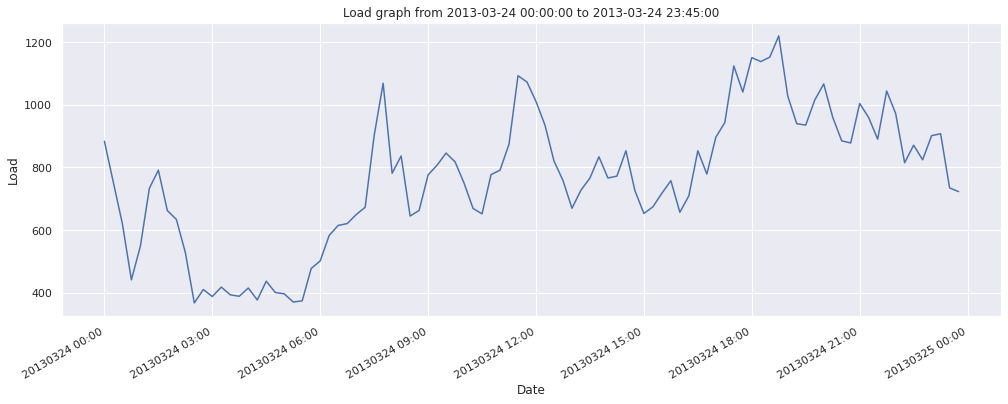

In [10]:
# Daily Plot
date_range = (df.index.max()-df.index.min()).days

start_date = df.index.min().date()
dt = datetime(year=start_date.year, month=start_date.month, day=start_date.day, hour=0, minute=0, second=0)

for index in range(0, date_range):
    if index==0:
        dt = datetime(year=start_date.year, month=start_date.month, day=start_date.day, hour=0, minute=0, second=0)
    else:
        dt = dt+ timedelta(days=1)
    dt2 = dt + timedelta(hours=23, minutes=45, seconds=0)
    start = f'{dt:%Y-%m-%d %H:%M:%S}'
    end = f'{dt2:%Y-%m-%d %H:%M:%S}'
    df_day = df.loc[start:end]
    plt.xlabel("Date")
    plt.ylabel("Load")
    plt.title(f'Load graph from {df_day.index.min()} to {df_day.index.max()}')
    plt.gcf().autofmt_xdate()
    myFmt = mdates.DateFormatter('%Y%m%d %H:%M')
    plt.gca().xaxis.set_major_formatter(myFmt)
    #plt.gca().xaxis.set_major_locator(mdates.HourLocator(interval = 1))
    plt.plot(df_day[['Load']])
    plt.pause(0.0001)

## Missig Values

In [11]:
print(df.Load.isnull().sum())
df[df.Load.isnull()]

3


Load  Year  Month Weekday Name
Date                                               
2013-01-01 16:30:00   NaN  2013      1      Tuesday
2013-03-25 12:00:00   NaN  2013      3       Monday
2013-03-25 17:30:00   NaN  2013      3       Monday

In [12]:
df.Load.fillna(df.Load.mean(), inplace=True) 
df[df.Load.isnull()]

Empty DataFrame
Columns: [Load, Year, Month, Weekday Name]
Index: []

In [17]:
df.head()

Load  Year  Month Weekday Name
Date                                                
2013-01-01 00:00:00  714.6  2013      1      Tuesday
2013-01-01 00:15:00  784.7  2013      1      Tuesday
2013-01-01 00:30:00  644.0  2013      1      Tuesday
2013-01-01 00:45:00  631.9  2013      1      Tuesday
2013-01-01 01:00:00  591.1  2013      1      Tuesday

## Trends and Seasonality

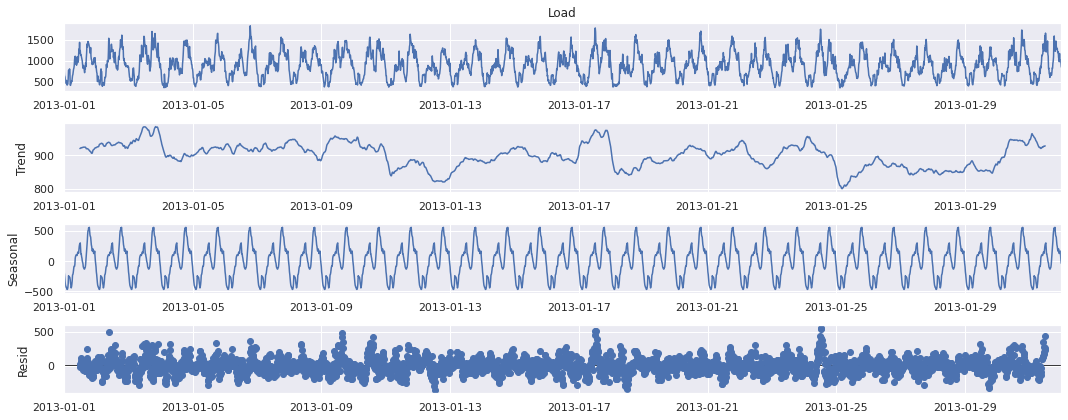

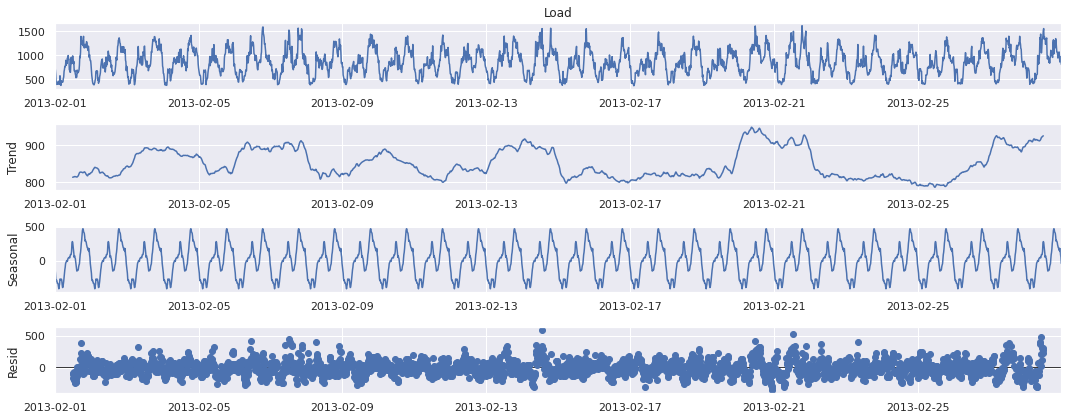

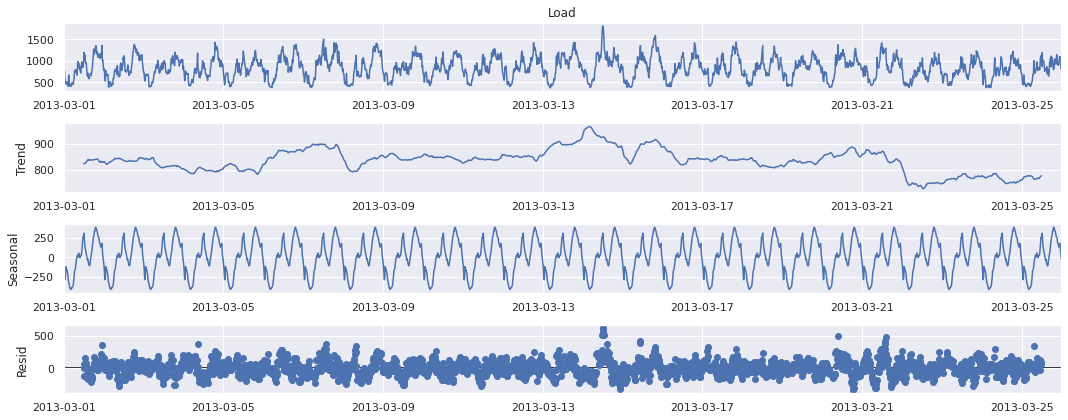

In [22]:
for index in range(1,4):
    temp_df = df[df['Month']==index]
    s=sm.tsa.seasonal_decompose(temp_df.Load,freq = ((24*60)//15))
    s.plot()

array([[<AxesSubplot:title={'center':'Load'}>]], dtype=object)

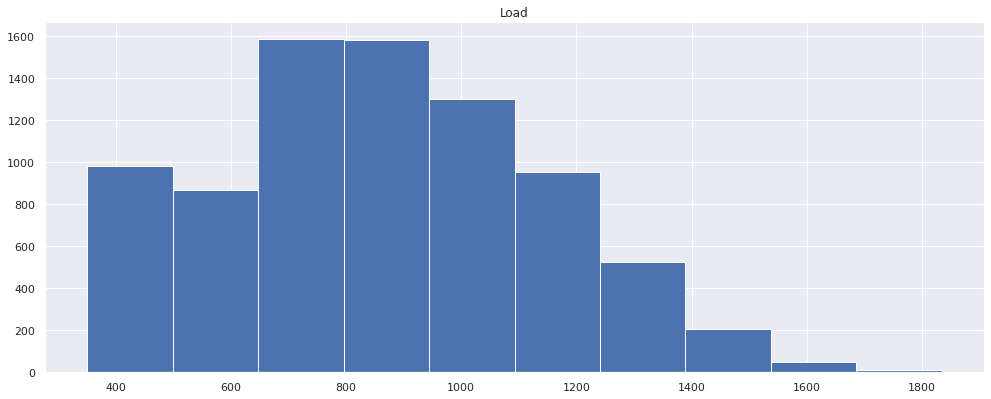

In [14]:
df.hist(column='Load')

In [15]:
list_split = np.array_split(df['Load'], 3, axis=0)

In [16]:
data_1, data_2, data_3 = list_split[0],list_split[1],list_split[2]
mean_1, mean_2, mean_3 = data_1.mean(), data_2.mean(), data_3.mean()
var_1, var_2, var_3 = data_1.var(), data_2.var(), data_3.var()

print(f' mean 1: {mean_1} | mean 2: {mean_2} | mean 3 {mean_3}')
print('-'*81)
print(f' var 1: {var_1}   | var 2: {var_2}   | var 3 {var_3}')

 mean 1: 899.1586379119631 | mean 2: 852.4425967261906 | mean 3 839.2548874310688
---------------------------------------------------------------------------------
 var 1: 89874.58499802597   | var 2: 72386.55079742272   | var 3 65635.0741118676
